<a href="https://colab.research.google.com/github/Valiyantt/CS3F-Elec/blob/main/Group_1_Structured_Equation_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Structured Equation Modeling** (SEM)
- Members: Alverio, Del Rosario, Escueta, Jamillano, Magno, Montalbo, Sayao

## **Initial Procedures**
*   Install and import libraries and import the raw dataset from Kaggle
*   Consolidated 6 .csv files into one .csv file for reading.

In [ ]:
pip install semopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 24.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.2/100.2 kB 8.4 MB/s eta 0:00:00
  Created wheel for semopy: filename=semopy-2.3.11-py3-none-any.whl size=1659681 sha256=285d4b6188f791c2af94e2a86f1f52aaf2666e914784bcc93d76646cbf116a7b
  Stored in directory: /root/.cache/pip/wheels/53/ec/0d/0b294c02d8c4e9e80afea58839f2c1b4706770594bc99ec045
Successfully built semopy


In [ ]:
import os
import kagglehub
import numpy as np
import pandas as pd
from semopy import Model

path = kagglehub.dataset_download("abrambeyer/us-hospital-customer-satisfaction-20162020")
print("Path to dataset files:", path)

100%|██████████| 41.0M/41.0M [00:01<00:00, 39.6MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/abrambeyer/us-hospital-customer-satisfaction-20162020/versions/1


In [ ]:
folder_path = "/root/.cache/kagglehub/datasets/abrambeyer/us-hospital-customer-satisfaction-20162020/versions/1"

# Read all CSV files in the folder and combine them
dfs = []  # List to store DataFrames
for file in os.listdir(folder_path):
    if file.endswith(".csv"):  # Ensure we're only reading CSV files
        file_path = os.path.join(folder_path, file)
        dfs.append(pd.read_csv(file_path))

# Combine all DataFrames into one
combined_df = pd.concat(dfs, ignore_index=True)

<ipython-input-3-2b08519f5760>:8: DtypeWarning: Columns (14,17,19,26) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs.append(pd.read_csv(file_path))
<ipython-input-3-2b08519f5760>:8: DtypeWarning: Columns (0,14,17,19,26) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs.append(pd.read_csv(file_path))


## **Step 1:**  Identify the constructs (latent variable) and observable variables (Indicators) that are part of the model

**Potential Constructs (Latent Variables) and Indicators**
1. *Patient Satisfaction*
- Indicators:
Patient Survey Star Rating
HCAHPS Answer Percent (responses like cleanliness, responsiveness)
2. *Care Quality*
- Indicators:
Effectiveness of care national comparison
Safety of care national comparison
Timeliness of care national comparison

3. *Service Responsiveness*
- Indicators:
Survey Response Rate Percent
Emergency Services
Meets criteria for promoting interoperability of EHRs

## **Step 2:** Specify the relationship between variable (e.g. *direct effect, indirect effects , mediation*)




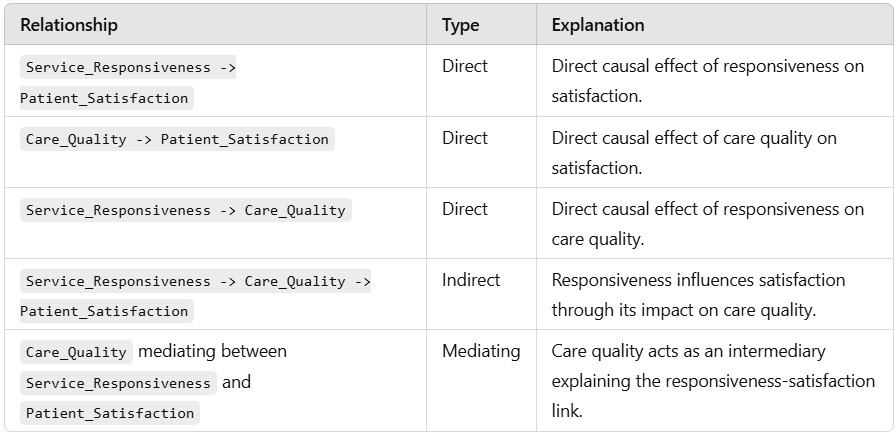



## **Step 3:** Formulate hypotheses that outline the expected relationship among constructs.

**1. Direct Effects**
- H1: Service Responsiveness has a significant positive effect on Patient Satisfaction.
Rationale: Higher responsiveness in service delivery directly improves patients' satisfaction with hospital services.

- H2: Care Quality has a significant positive effect on Patient Satisfaction.
Rationale: Higher quality of care provided by the hospital directly enhances patient satisfaction.

- H3: Service Responsiveness has a significant positive effect on Care Quality.
Rationale: Better responsiveness in services ensures improved care quality through timely and effective interventions.

**2. Indirect Effects**
- H4: Service Responsiveness indirectly influences Patient Satisfaction through Care Quality.
Rationale: The relationship between service responsiveness and satisfaction is mediated by the level of care quality.

**3. Mediation Effects**
- H5: Care Quality mediates the relationship between Service Responsiveness and Patient Satisfaction.
Rationale: Care quality acts as an intermediary mechanism through which responsiveness impacts satisfaction.

## **Step 4:** Specify the measurement model  by identifying which  variables (indicators) measures each latent construct.

**1. Latent Variable: Service_Responsiveness**

*Observed indicators:*

- Survey_Response_Rate
- Emergency_Services
- EHR_Interoperability

*Relationship:*

Service Responsiveness ~ Survey Response Rate, Emergency Services, EHR Interoperability

**2. Latent Variable: Care_Quality**
*Observed indicators:*

- Effectiveness_of_care
- Safety_of_care
- Timeliness_of_care

*Relationship:*

Care Quality ~ Effectiveness of Care, Safety of Care, Timeliness of Care


**3. Latent Variable: Patient_Satisfaction**

*Observed indicators:*

- Patient_Survey_Star_Rating
- HCAHPS_Answer_Percent

*Relationship:*

Patient Satisfaction ~ Patient Survey Star Rating, HCAHPS Answer Percent


## **Step 5:** Define the measurement model , detailing how each latent variables is operationalized through its indicators.

**1. Latent Variable: Service_Responsiveness**

This construct represents how responsive the hospital is to patient needs, operationalized by:
- Survey Response Rate: The percentage of patients who respond to satisfaction surveys, indicating engagement and willingness to provide feedback.
- Emergency Services: Availability and quality of emergency medical services.
- EHR Interoperability: The hospital's ability to share patient data efficiently across electronic health records systems.

*Mathematical Representation:*

Service Responsiveness ~ Survey Response Rate, Emergency Services, EHR Interoperability

**2. Latent Variable: Care_Quality**

This construct captures the quality of care delivered by the hospital, operationalized by:
- Effectiveness of Care: The hospital’s success in achieving desired health outcomes for patients.
- Safety of Care: Measures to minimize errors and harm to patients during healthcare delivery.
- Timeliness of Care: How quickly patients receive care and treatment when needed.

*Mathematical Representation:*

Care Quality ~ Effectiveness of Care, Safety of Care, Timeliness of Care

**3. Latent Variable: Patient_Satisfaction**

This construct reflects the overall satisfaction level of patients with their hospital experience, operationalized by:
- Patient Survey Star Rating: Aggregate star ratings based on patient feedback.
- HCAHPS Answer Percent: Percentage scores from the Hospital Consumer Assessment of Healthcare Providers and Systems survey.

*Mathematical Representation:*

Patient Satisfaction ~ Patient Survey Star Rating, HCAHPS Answer Percent


## **Step 6:** Decide if the indicators are reflective (caused by the latent variable) or formative (forming the latent variable)

For all constructs, the indicators are reflective, meaning:

- Changes in the latent variable cause changes in its indicators.

- Example: Higher Service_Responsiveness leads to better Survey Response Rate, Emergency Services, and EHR Interoperability.

## **Step 7:** Ensure an adequate sample size generally large samples with 10-20 observations per parameter as a rule of thumb

In [ ]:
# Show total number of rows and columns
total_rows, total_columns = combined_df.shape
print(f'Total number of rows: {total_rows}')
print(f'Total number of columns: {total_columns}')

Total number of rows: 1653683
Total number of columns: 43


## **Step 8:** Collect data through surveys, experiments or secondary data sources.

We collected the Dataset from Kaggle titled: **U.S. Hospital Customer Satisfaction. 2016-2020**.

*Reference Link:* https://bit.ly/3CuuLsU

The dataset as given earlier has a total of 1,653,683 responses spanning from the year 2016 - 2020. With this dataset, it would provide a robust resource in which to train the SEM machine.



## **Step 9:** Handle missing data, outlier and asses the data normality
Data Cleaning (Missing Values & Outliers) and Data Standardization

### ***Data Cleaning, Mapping, Handle of Null Values, and Standardization***

In [ ]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
# Check for missing values in each column and the entire DataFrame
missing_info = {
    "Column Null Counts": combined_df.isnull().sum(),
    "DataFrame Has Nulls": combined_df.isnull().values.any()
}

for key, value in missing_info.items():
    print(f"{key}: {value}")

Column Null Counts: Facility ID                                                            0
Facility Name                                                          0
Address                                                                0
City                                                                   0
State                                                                  0
ZIP Code                                                               0
County Name                                                         2400
Phone Number                                                           0
HCAHPS Measure ID                                                      0
HCAHPS Question                                                        0
HCAHPS Answer Description                                              0
Patient Survey Star Rating                                             0
Patient Survey Star Rating Footnote                              1576857
HCAHPS Answer Percent          

In [ ]:
# In evaluation of the actual raw datasets, footnotes do not hold any value so will will drop them from the dataset
# We drop also collumns to since they are irrelevant to the analysis process

# List of columns to remove
columns_to_remove = [
    'Patient Survey Star Rating', 'County Name', 'Phone Number', 'ZIP Code', 'Address',
    'Patient Survey Star Rating Footnote', 'HCAHPS Answer Percent Footnote',
    'Number of Completed Surveys Footnote', 'Survey Response Rate Percent Footnote',
    'Hospital overall rating footnote', 'Mortality national comparison footnote',
    'Safety of care national comparison footnote', 'Readmission national comparison footnote',
    'Patient experience national comparison footnote', 'Effectiveness of care national comparison footnote',
    'Timeliness of care national comparison footnote', 'Efficient use of medical imaging national comparison footnote'
]

# Drop the specified columns
cleaned_df = combined_df.drop(columns=columns_to_remove)

# Drop rows with missing values in 'Meets criteria for promoting interoperability of EHRs'
cleaned_df = cleaned_df.dropna(subset=['Meets criteria for promoting interoperability of EHRs'])

# Show total number of rows and columns
total_rows, total_columns = combined_df.shape
print(f'Total number of rows: {total_rows}')
print(f'Total number of columns: {total_columns}')

# Show total number of rows and columns
total_rows, total_columns = cleaned_df.shape
print(f'Total number of rows: {total_rows}')
print(f'Total number of columns: {total_columns}')

Total number of rows: 1653683
Total number of columns: 43
Total number of rows: 1440651
Total number of columns: 26


In [ ]:
# Rename columns for consistency
cleaned_df = cleaned_df.rename(columns={
    "HCAHPS Answer Percent": "HCAHPS_Answer_Percent",
    "HCAHPS Linear Mean Value": "HCAHPS_Linear_Mean_Value",
    "Number of Completed Surveys": "Number_of_Completed_Surveys",
    "Effectiveness of care national comparison": "Effectiveness_of_care",
    "Safety of care national comparison": "Safety_of_care",
    "Timeliness of care national comparison": "Timeliness_of_care",
    "Survey Response Rate Percent": "Survey_Response_Rate",
    "Emergency Services": "Emergency_Services",
    "Meets criteria for promoting interoperability of EHRs": "EHR_Interoperability"
})

In [ ]:
cleaned_df.head()

,Facility ID,Facility Name,City,State,HCAHPS Measure ID,HCAHPS Question,HCAHPS Answer Description,HCAHPS_Answer_Percent,HCAHPS_Linear_Mean_Value,Number_of_Completed_Surveys,...,Emergency_Services,EHR_Interoperability,Hospital overall rating,Mortality national comparison,Safety_of_care,Readmission national comparison,Patient experience national comparison,Effectiveness_of_care,Timeliness_of_care,Efficient use of medical imaging national comparison
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,DOTHAN,AL,H_COMP_1_A_P,"Patients who reported that their nurses ""Alway...","Nurses ""always"" communicated well",74,Not Applicable,558,...,Yes,Y,2,Below the national average,Above the national average,Below the national average,Below the national average,Same as the national average,Above the national average,Same as the national average
1,10001,SOUTHEAST ALABAMA MEDICAL CENTER,DOTHAN,AL,H_COMP_1_SN_P,"Patients who reported that their nurses ""Somet...","Nurses ""sometimes"" or ""never"" communicated well",8,Not Applicable,558,...,Yes,Y,2,Below the national average,Above the national average,Below the national average,Below the national average,Same as the national average,Above the national average,Same as the national average
2,10001,SOUTHEAST ALABAMA MEDICAL CENTER,DOTHAN,AL,H_COMP_1_U_P,"Patients who reported that their nurses ""Usual...","Nurses ""usually"" communicated well",18,Not Applicable,558,...,Yes,Y,2,Below the national average,Above the national average,Below the national average,Below the national average,Same as the national average,Above the national average,Same as the national average
3,10001,SOUTHEAST ALABAMA MEDICAL CENTER,DOTHAN,AL,H_COMP_1_LINEAR_SCORE,Nurse communication - linear mean score,Nurse communication - linear mean score,Not Applicable,88,558,...,Yes,Y,2,Below the national average,Above the national average,Below the national average,Below the national average,Same as the national average,Above the national average,Same as the national average
4,10001,SOUTHEAST ALABAMA MEDICAL CENTER,DOTHAN,AL,H_COMP_1_STAR_RATING,Nurse communication - star rating,Nurse communication - star rating,Not Applicable,Not Applicable,558,...,Yes,Y,2,Below the national average,Above the national average,Below the national average,Below the national average,Same as the national average,Above the national average,Same as the national average


In [ ]:
# Apply mapping for the data that has rankings.
# Impute specific categorical values of Not Applicable to 3 as a fair score and Not Available as 0
mapping = {
    'HCAHPS_Answer_Percent': {
        'Not Available': 0,
        'Not Applicable': 3
    },
    'HCAHPS_Linear_Mean_Value': {
        'Not Available': 0,
        'Not Applicable': 0
    },
    'Emergency_Services': {
        'Yes': 1,
        'No': 0,
        'Not Available': 0
    },
    'Effectiveness_of_care': {
        'Above the national average': 2,
        'Above the National average': 2,
        'Same as the national average': 1,
        'Same as the National average': 1,
        'Below the national average': 0,
        'Below the National average': 0,
        'Not Available': 0,
        'Not Applicable': 1
    },
    'Safety_of_care': {
        'Above the national average': 2,
        'Above the National average': 2,
        'Same as the national average': 1,
        'Same as the National average': 1,
        'Below the national average': 0,
        'Below the National average': 0,
        'Not Available': 0,
        'Not Applicable': 1
    },
    'Timeliness_of_care': {
        'Above the national average': 2,
        'Above the National average': 2,
        'Same as the national average': 1,
        'Same as the National average': 1,
        'Below the national average': 0,
        'Below the National average': 0,
        'Not Available': 0,
        'Not Applicable': 1
    },
    'EHR_Interoperability': {
        'Y': 1,
        'N': 0,
        'Not Available': 0,
        'Not Applicable': 1
    },
    'Survey_Response_Rate': {
        'Not Available': 50
    }
}

# Apply the mappings to the DataFrame
for column, mappings in mapping.items():
    if column in cleaned_df.columns:  # Check if the column exists
        cleaned_df[column] = cleaned_df[column].replace(mappings)

# Convert relevant columns to numeric where applicable
for column in mapping.keys():
    if column in cleaned_df.columns:
        cleaned_df[column] = pd.to_numeric(cleaned_df[column], errors='coerce')

# Verify updated DataFrame
print(cleaned_df.dtypes)

<ipython-input-10-01f0c1aef4d0>:61: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cleaned_df[column] = cleaned_df[column].replace(mappings)


Facility ID                                             object
Facility Name                                           object
City                                                    object
State                                                   object
HCAHPS Measure ID                                       object
HCAHPS Question                                         object
HCAHPS Answer Description                               object
HCAHPS_Answer_Percent                                    int64
HCAHPS_Linear_Mean_Value                                 int64
Number_of_Completed_Surveys                             object
Survey_Response_Rate                                     int64
Start Date                                              object
End Date                                                object
Year                                                     int64
Hospital Type                                           object
Hospital Ownership                                     

In [ ]:
from sklearn.preprocessing import StandardScaler

# Identify numeric columns for standardization
numeric_cols = cleaned_df.select_dtypes(include=['float64', 'int64']).columns

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply standardization to numeric columns
cleaned_df[numeric_cols] = scaler.fit_transform(cleaned_df[numeric_cols])

# Verify the results of standardization
print("\nSummary statistics for numeric columns after standardization:")
print(cleaned_df[numeric_cols].describe())

# Display the updated DataFrame shape
print(f"Cleaned DataFrame shape: {cleaned_df.shape}")



Summary statistics for numeric columns after standardization:
       HCAHPS_Answer_Percent  HCAHPS_Linear_Mean_Value  Survey_Response_Rate  \
count           1.440651e+06              1.440651e+06          1.440651e+06   
mean            4.655898e-18              5.137270e-17          1.868672e-16   
std             1.000000e+00              1.000000e+00          1.000000e+00   
min            -7.837858e-01             -3.639210e-01         -2.300200e+00   
25%            -6.756255e-01             -3.639210e-01         -7.269679e-01   
50%            -5.674652e-01             -3.639210e-01         -1.717093e-01   
75%             2.617640e-01             -3.639210e-01          4.760923e-01   
max             2.821558e+00              3.224727e+00          5.565962e+00   

               Year  Emergency_Services  EHR_Interoperability  Safety_of_care  \
count  1.440651e+06        1.440651e+06          1.440651e+06    1.440651e+06   
mean   1.498220e-14        7.780873e-17          4.489

### ***Outlier Handling, and Data Assessment***

In [ ]:
from sklearn.preprocessing import RobustScaler
from scipy.stats import zscore
import scipy.stats as stats
import seaborn as sns

Number of outliers detected (Z-Score method):
HCAHPS_Answer_Percent           0
HCAHPS_Linear_Mean_Value    10244
Survey_Response_Rate         5370
Year                            0
Emergency_Services          80993
EHR_Interoperability          165
Safety_of_care                  0
Effectiveness_of_care           0
Timeliness_of_care              0
dtype: int64

Number of outliers detected (IQR method):
HCAHPS_Answer_Percent         2031
HCAHPS_Linear_Mean_Value    169131
Survey_Response_Rate          2475
Year                             0
Emergency_Services           80993
EHR_Interoperability           165
Safety_of_care                   0
Effectiveness_of_care            0
Timeliness_of_care               0
dtype: int64


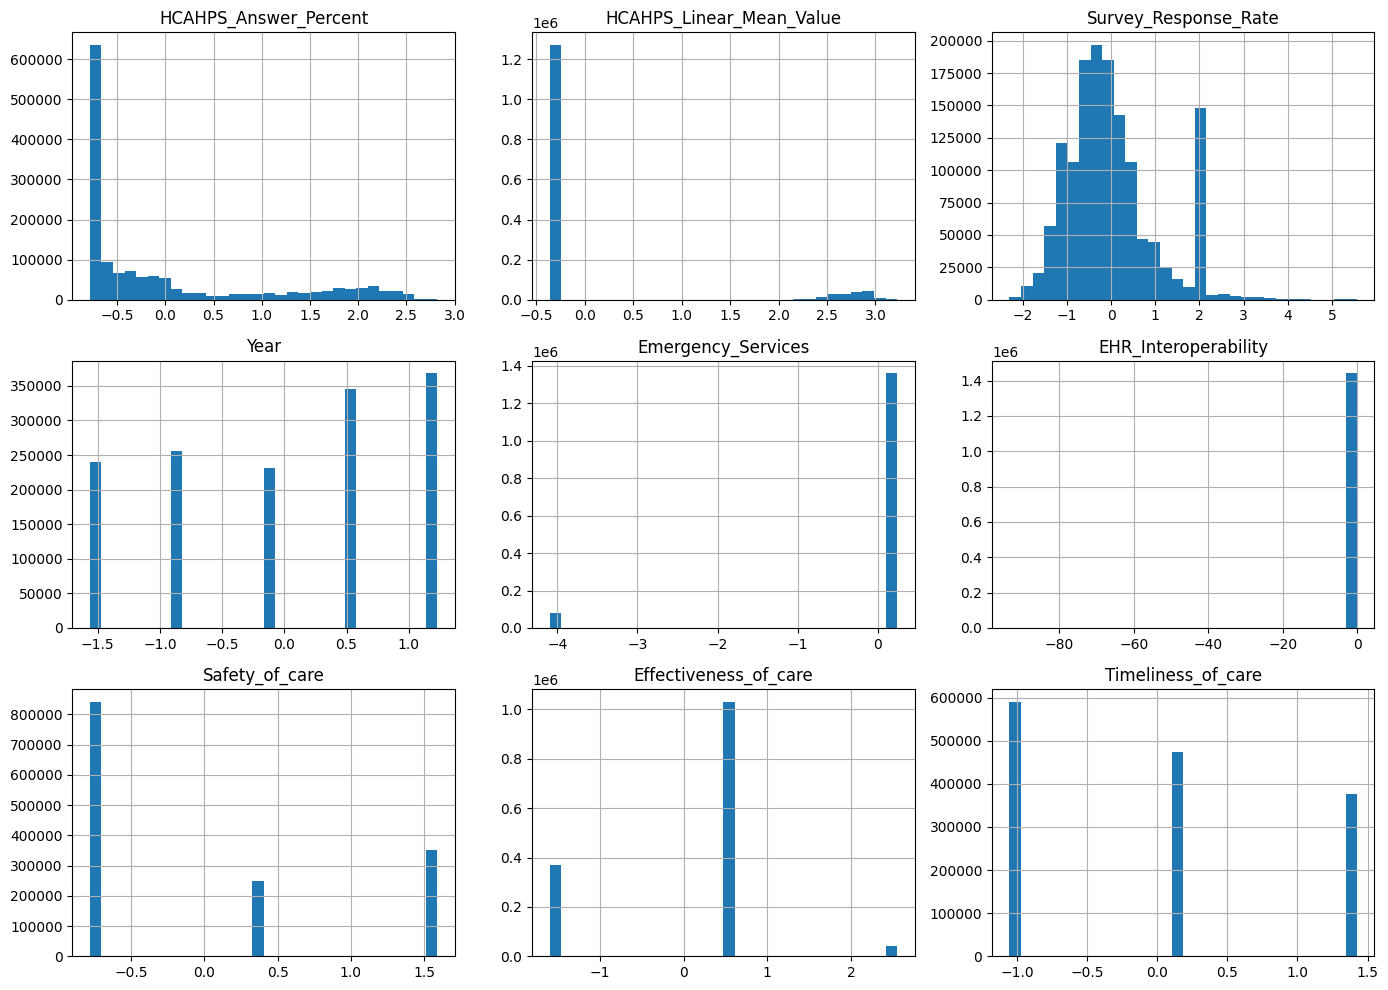

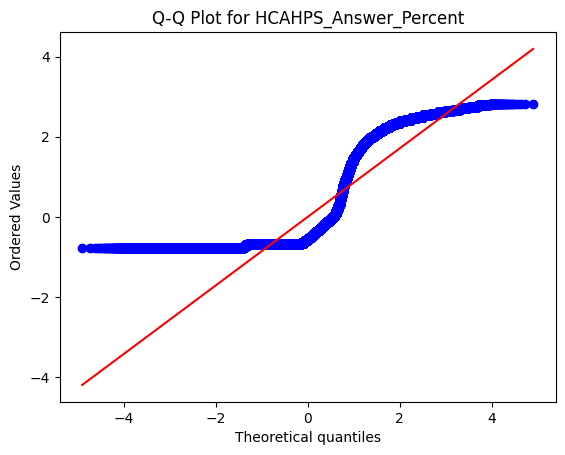

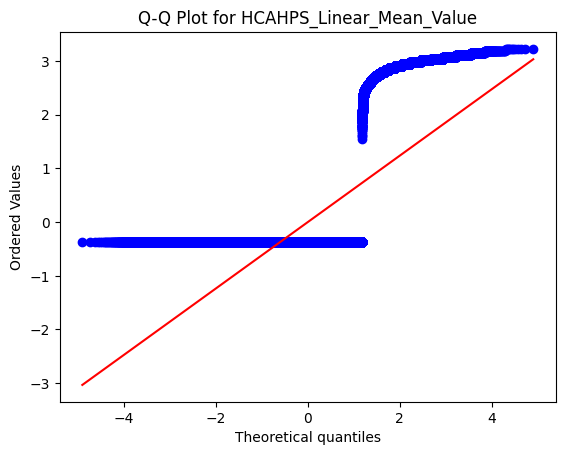

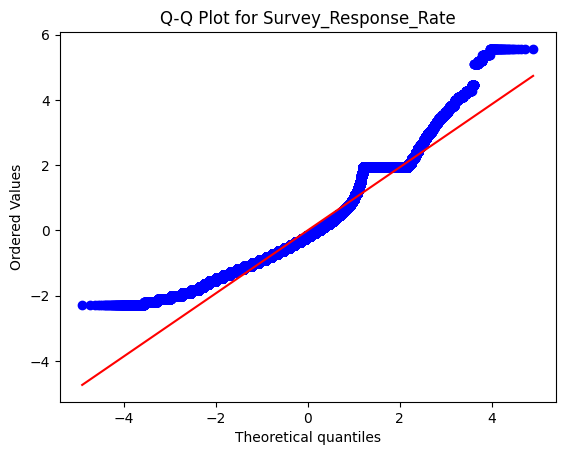

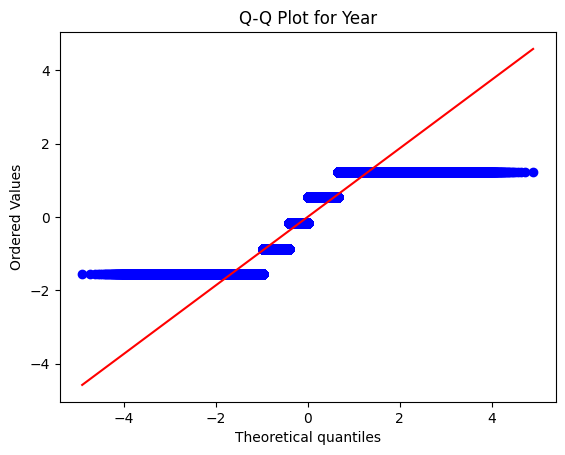

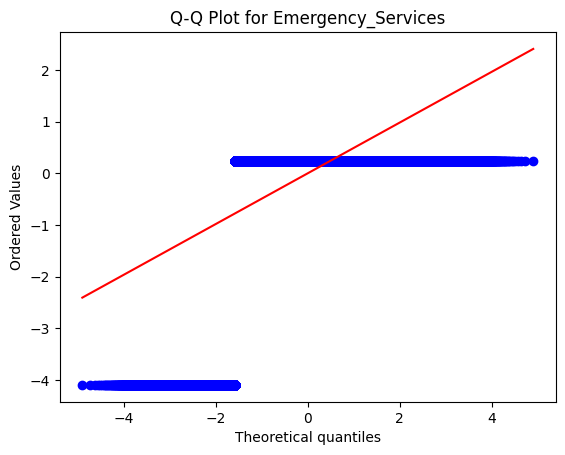

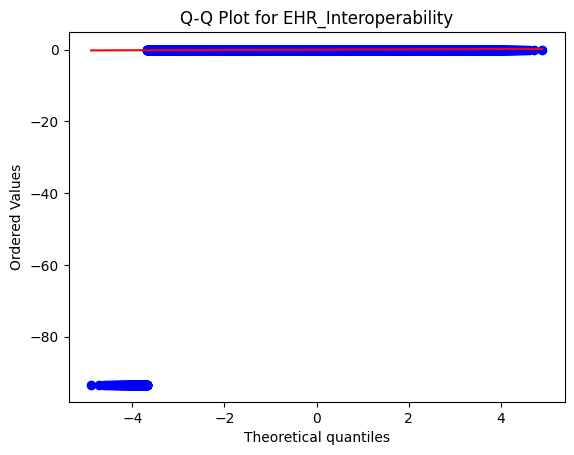

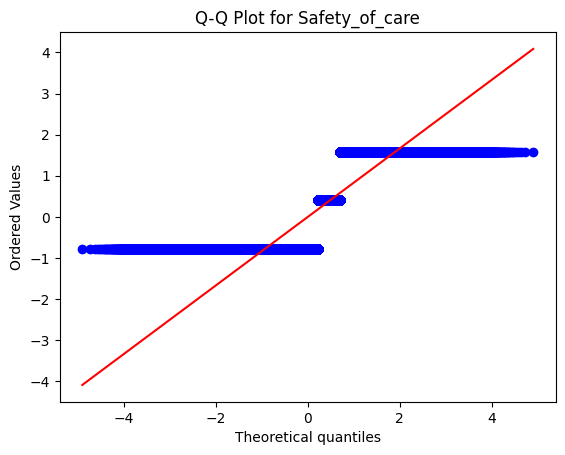

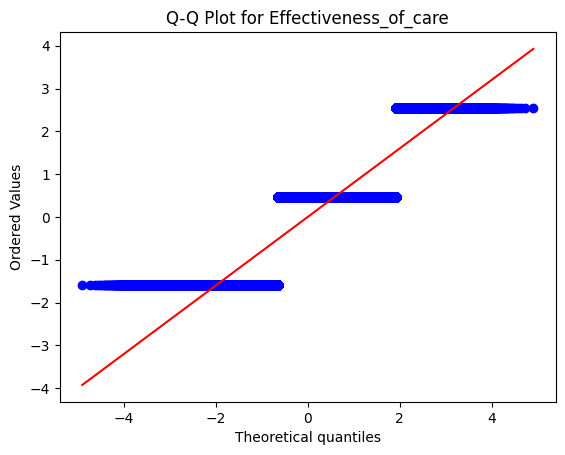

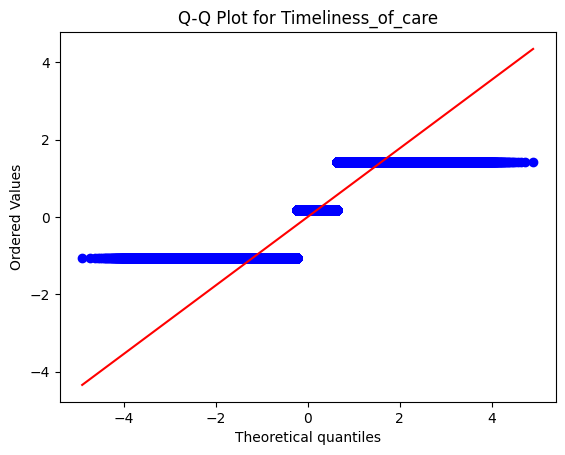

In [ ]:
# Calculate Z-scores for numeric columns
z_scores = cleaned_df[numeric_cols].apply(zscore)

# Mark rows with Z-score > 3 or < -3 as potential outliers
outliers_z = (z_scores.abs() > 3)

# Count of outliers in each column
outliers_count_z = outliers_z.sum()
print("Number of outliers detected (Z-Score method):")
print(outliers_count_z)

# IQR Method for outlier detection
Q1 = cleaned_df[numeric_cols].quantile(0.25)
Q3 = cleaned_df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers as values beyond 1.5*IQR
outliers_iqr = ((cleaned_df[numeric_cols] < (Q1 - 2.5 * IQR)) |
                (cleaned_df[numeric_cols] > (Q3 + 2.5 * IQR)))

outliers_count_iqr = outliers_iqr.sum()
print("\nNumber of outliers detected (IQR method):")
print(outliers_count_iqr)

cleaned_df[numeric_cols].hist(figsize=(14, 10), bins=30)
plt.tight_layout()
plt.show()

for col in numeric_cols:
    stats.probplot(cleaned_df[col], dist="norm", plot=plt)
    plt.title(f"Q-Q Plot for {col}")
    plt.show()

In [ ]:
# Replace outliers with the column median
for col in numeric_cols:
    median = cleaned_df[col].median()
    cleaned_df[col] = np.where(
        (cleaned_df[col] < (Q1[col] - 2.5 * IQR[col])) |
        (cleaned_df[col] > (Q3[col] + 2.5 * IQR[col])),
        median,
        cleaned_df[col]
    )

print("Outliers have been imputed with median values.")

# IQR Method for outlier detection
Q1 = cleaned_df[numeric_cols].quantile(0.25)
Q3 = cleaned_df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers as values beyond 1.5*IQR
outliers_iqr = ((cleaned_df[numeric_cols] < (Q1 - 2.5 * IQR)) |
                (cleaned_df[numeric_cols] > (Q3 + 2.5 * IQR)))

outliers_count_iqr = outliers_iqr.sum()
print("\nNumber of outliers detected (IQR method):")
print(outliers_count_iqr)


Outliers have been imputed with median values.

Number of outliers detected (IQR method):
HCAHPS_Answer_Percent       0
HCAHPS_Linear_Mean_Value    0
Survey_Response_Rate        0
Year                        0
Emergency_Services          0
EHR_Interoperability        0
Safety_of_care              0
Effectiveness_of_care       0
Timeliness_of_care          0
dtype: int64


In [ ]:
from scipy.stats import shapiro
for col in numeric_cols:
    stat, p_value = shapiro(cleaned_df[col])
    print(f"{col} - p-value: {p_value}")

correlation_matrix = cleaned_df[numeric_cols].corr()
print(correlation_matrix)

HCAHPS_Answer_Percent - p-value: 7.3253282789169e-193
HCAHPS_Linear_Mean_Value - p-value: 1.0


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 1440651.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  res = hypotest_fun_out(*samples, **kwds)


Survey_Response_Rate - p-value: 1.8130198437774474e-143
Year - p-value: 5.406767833323897e-166
Emergency_Services - p-value: 1.0
EHR_Interoperability - p-value: 1.0
Safety_of_care - p-value: 2.090532427672686e-197
Effectiveness_of_care - p-value: 2.3209111999197096e-203
Timeliness_of_care - p-value: 1.1895236358311755e-184
                          HCAHPS_Answer_Percent  HCAHPS_Linear_Mean_Value  \
HCAHPS_Answer_Percent                  1.000000                       NaN   
HCAHPS_Linear_Mean_Value                    NaN                       NaN   
Survey_Response_Rate                  -0.180103                       NaN   
Year                                   0.091952                       NaN   
Emergency_Services                          NaN                       NaN   
EHR_Interoperability                        NaN                       NaN   
Safety_of_care                         0.083842                       NaN   
Effectiveness_of_care                  0.116895            

In [ ]:
scaler = RobustScaler()
cleaned_df[numeric_cols] = scaler.fit_transform(cleaned_df[numeric_cols])

In [ ]:
numeric_cols = cleaned_df.select_dtypes(include=[np.number]).columns
numeric_cols = numeric_cols.drop(['Year', 'Emergency_Services'])

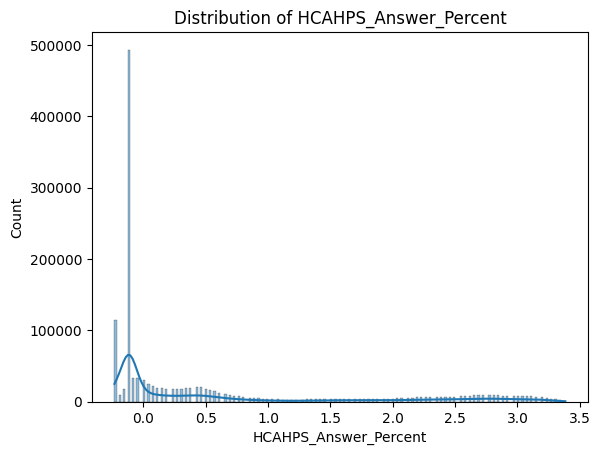

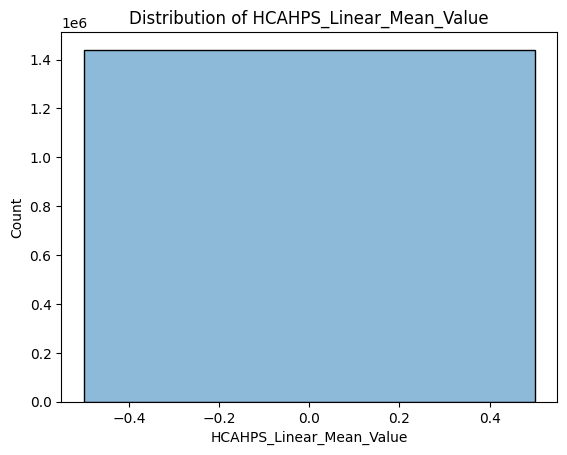

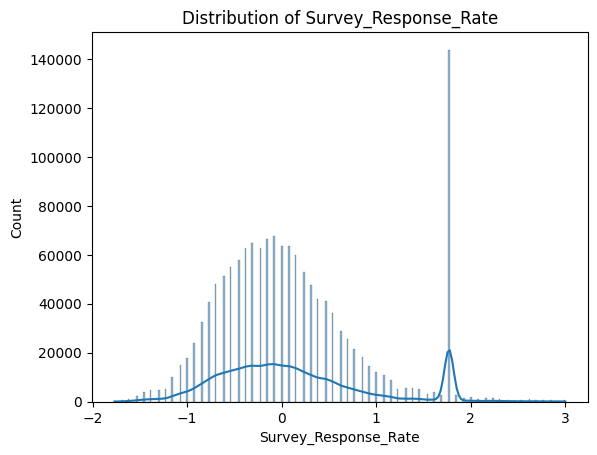

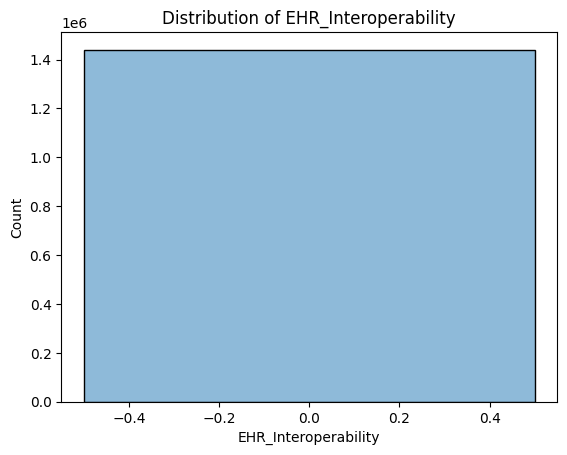

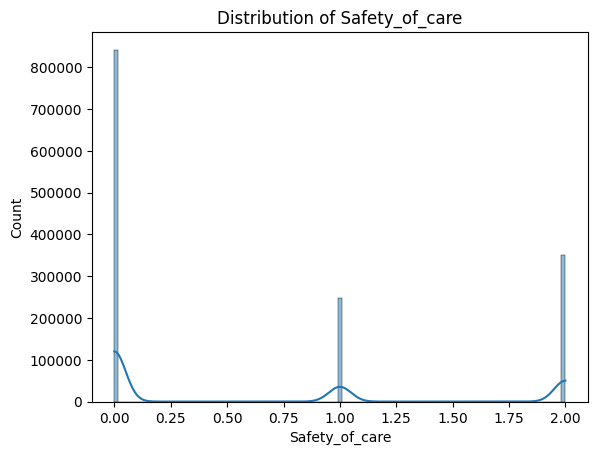

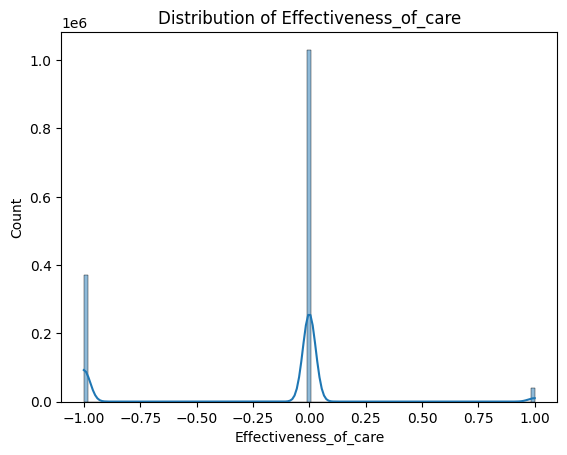

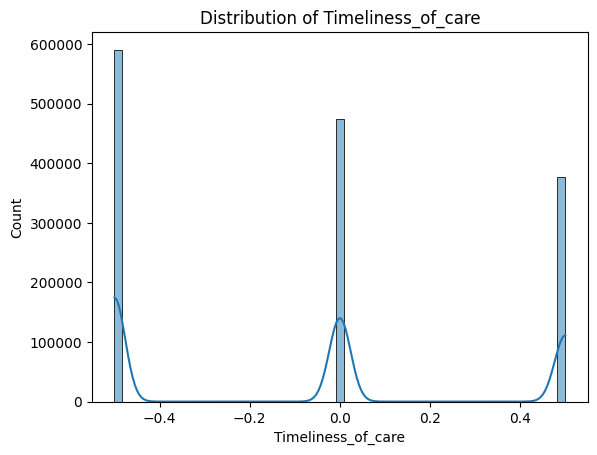

In [ ]:
 for col in numeric_cols:
    sns.histplot(cleaned_df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

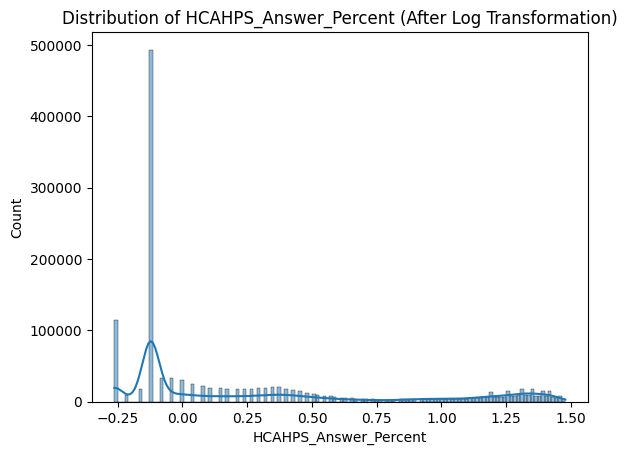

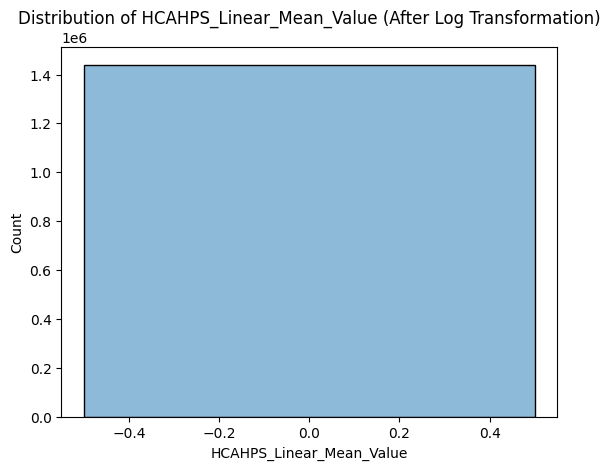

In [ ]:
# Applied Log transformation
skewed_cols = ['HCAHPS_Answer_Percent', 'HCAHPS_Linear_Mean_Value']
for col in skewed_cols:
    cleaned_df[col] = np.log1p(cleaned_df[col])

for col in skewed_cols:
    sns.histplot(cleaned_df[col], kde=True)
    plt.title(f"Distribution of {col} (After Log Transformation)")
    plt.show()

In [ ]:
# Recalculate Z-scores
z_scores_transformed = cleaned_df[skewed_cols].apply(zscore)

# Detect outliers (Z-score > 3 or < -3)
outliers_z_transformed = (z_scores_transformed.abs() > 3)

# Count of outliers
outliers_count_z_transformed = outliers_z_transformed.sum()
print("Number of outliers detected (Z-Score method after log transformation):")
print(outliers_count_z_transformed)

Number of outliers detected (Z-Score method after log transformation):
HCAHPS_Answer_Percent       0
HCAHPS_Linear_Mean_Value    0
dtype: int64


In [ ]:
# Recalculate IQR
Q1_transformed = cleaned_df[skewed_cols].quantile(0.25)
Q3_transformed = cleaned_df[skewed_cols].quantile(0.75)
IQR_transformed = Q3_transformed - Q1_transformed

# Detect outliers using IQR
outliers_iqr_transformed = (
    (cleaned_df[skewed_cols] < (Q1_transformed - 1.5 * IQR_transformed)) |
    (cleaned_df[skewed_cols] > (Q3_transformed + 1.5 * IQR_transformed))
)

# Count of outliers
outliers_count_iqr_transformed = outliers_iqr_transformed.sum()
print("\nNumber of outliers detected (IQR method after log transformation):")
print(outliers_count_iqr_transformed)


Number of outliers detected (IQR method after log transformation):
HCAHPS_Answer_Percent       0
HCAHPS_Linear_Mean_Value    0
dtype: int64


In [ ]:
# Cap outliers using IQR limits
for col in skewed_cols:
    lower_limit = Q1_transformed[col] - 1.5 * IQR_transformed[col]
    upper_limit = Q3_transformed[col] + 1.5 * IQR_transformed[col]
    cleaned_df[col] = cleaned_df[col].clip(lower=lower_limit, upper=upper_limit)

print("Outliers capped at IQR limits.")

Outliers capped at IQR limits.


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
cleaned_df[skewed_cols] = scaler.fit_transform(cleaned_df[skewed_cols])

print("Data normalized after log transformation and outlier handling.")

Data normalized after log transformation and outlier handling.


Explained variance by components: [0.39641253 0.25252094]


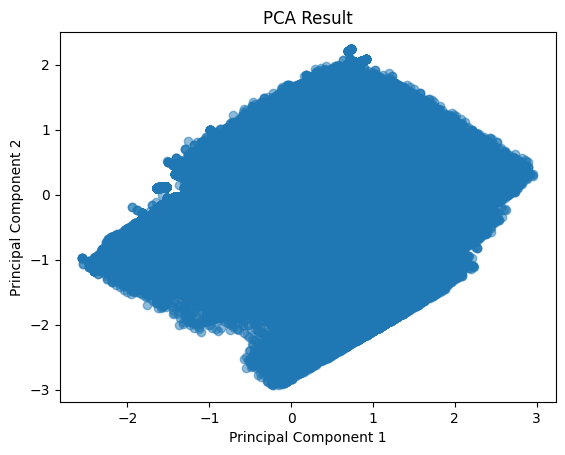

In [ ]:
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
import numpy as np
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_data = cleaned_df.select_dtypes(include=[np.number])

# Handle missing values by imputing with the column mean
imputer = SimpleImputer(strategy="mean")
numeric_data_imputed = imputer.fit_transform(numeric_data)

# Apply PCA
pca = PCA(n_components=2)  # Adjust the number of components as needed
pca_result = pca.fit_transform(numeric_data_imputed)

# Explained variance ratio
print("Explained variance by components:", pca.explained_variance_ratio_)

# Visualize PCA results
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Result")
plt.show()

In [ ]:
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Cumulative explained variance:", np.cumsum(pca.explained_variance_ratio_))

Explained variance ratio: [0.39641253 0.25252094]
Cumulative explained variance: [0.39641253 0.64893347]


### ***Data Visualization***

In [ ]:
column_names = cleaned_df.columns
print(column_names)

Index(['Facility ID', 'Facility Name', 'City', 'State', 'HCAHPS Measure ID',
       'HCAHPS Question', 'HCAHPS Answer Description', 'HCAHPS_Answer_Percent',
       'HCAHPS_Linear_Mean_Value', 'Number_of_Completed_Surveys',
       'Survey_Response_Rate', 'Start Date', 'End Date', 'Year',
       'Hospital Type', 'Hospital Ownership', 'Emergency_Services',
       'EHR_Interoperability', 'Hospital overall rating',
       'Mortality national comparison', 'Safety_of_care',
       'Readmission national comparison',
       'Patient experience national comparison', 'Effectiveness_of_care',
       'Timeliness_of_care',
       'Efficient use of medical imaging national comparison'],
      dtype='object')


Index(['Facility ID', 'Facility Name', 'City', 'State', 'HCAHPS Measure ID',
       'HCAHPS Question', 'HCAHPS Answer Description', 'HCAHPS_Answer_Percent',
       'HCAHPS_Linear_Mean_Value', 'Number_of_Completed_Surveys',
       'Survey_Response_Rate', 'Start Date', 'End Date', 'Year',
       'Hospital Type', 'Hospital Ownership', 'Emergency_Services',
       'EHR_Interoperability', 'Hospital overall rating',
       'Mortality national comparison', 'Safety_of_care',
       'Readmission national comparison',
       'Patient experience national comparison', 'Effectiveness_of_care',
       'Timeliness_of_care',
       'Efficient use of medical imaging national comparison'],
      dtype='object')
Visualizing Patient Satisfaction...


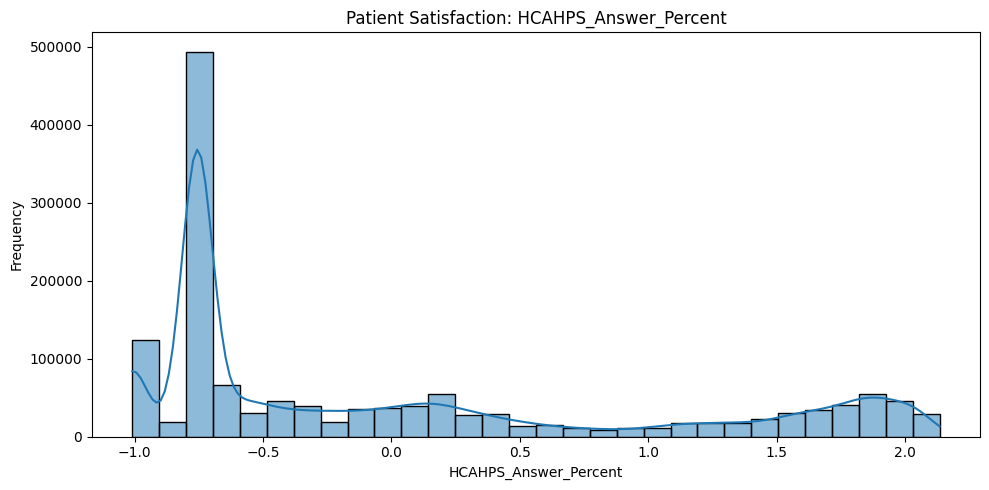

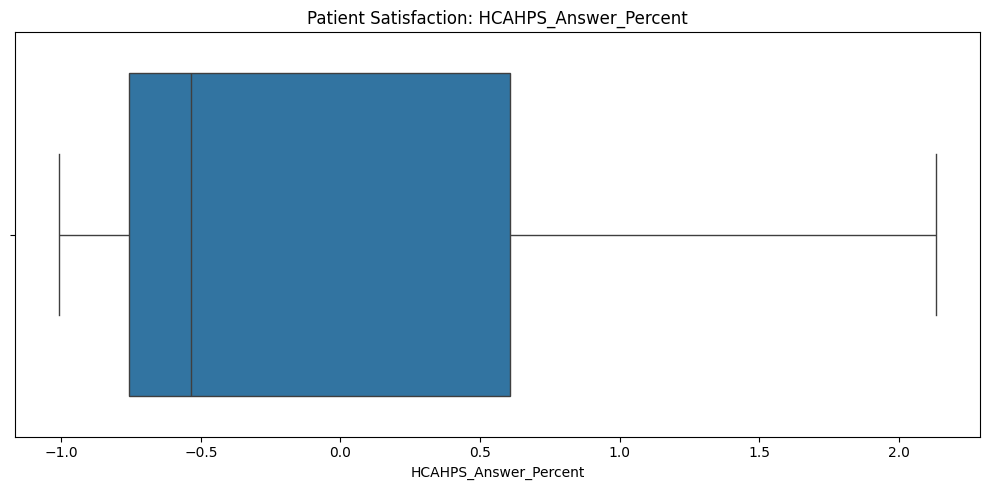

Visualizing Care Quality...


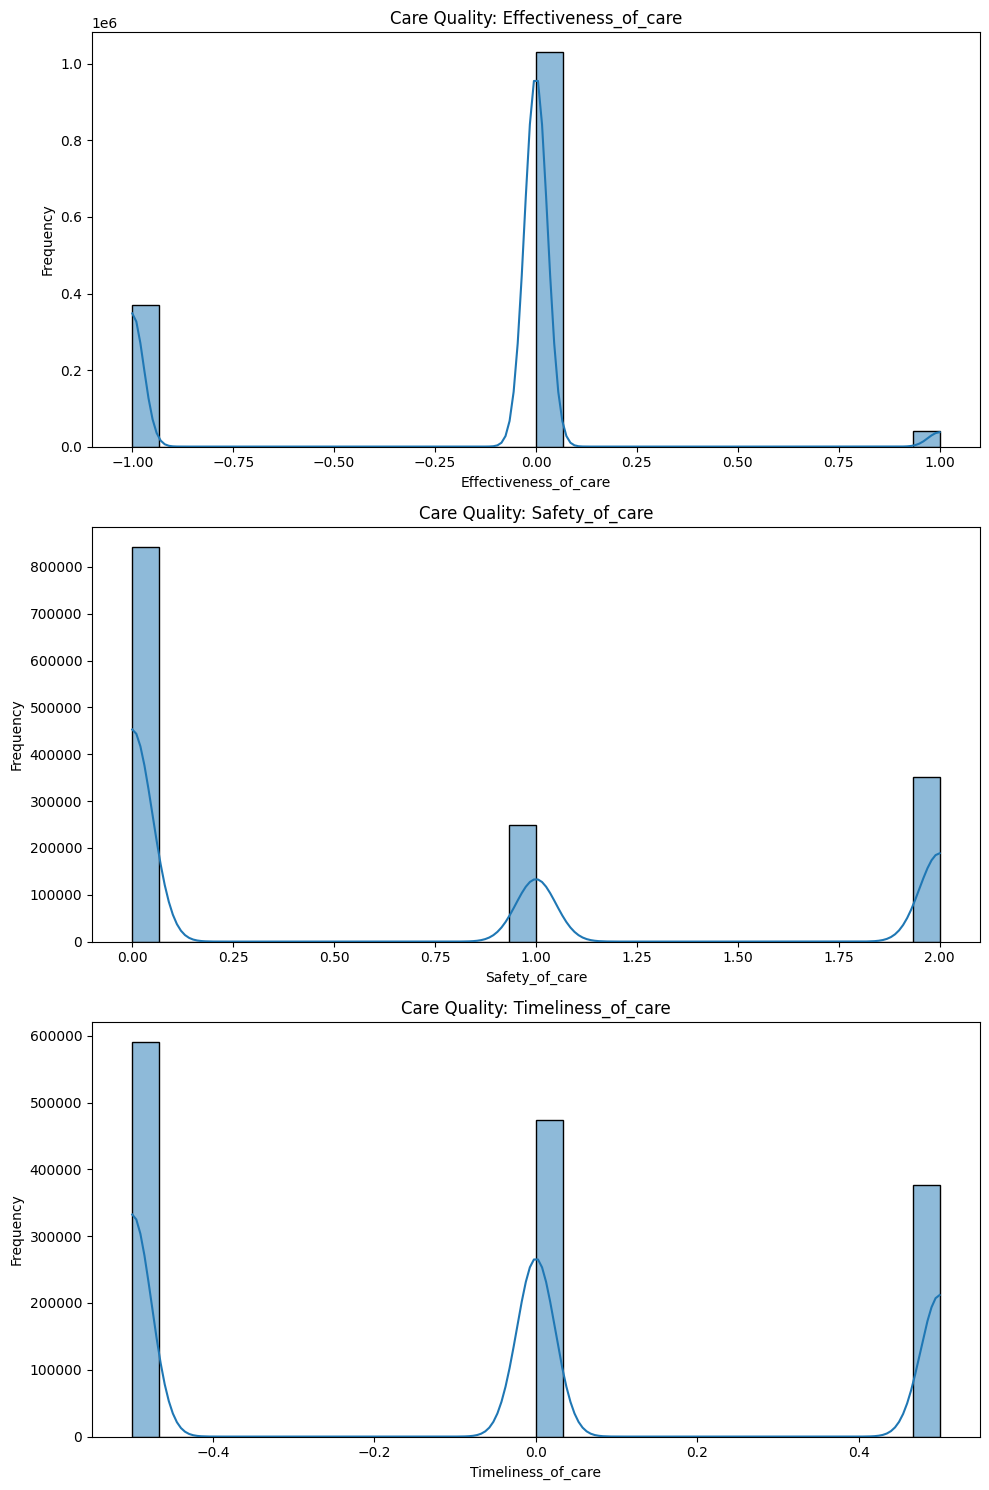

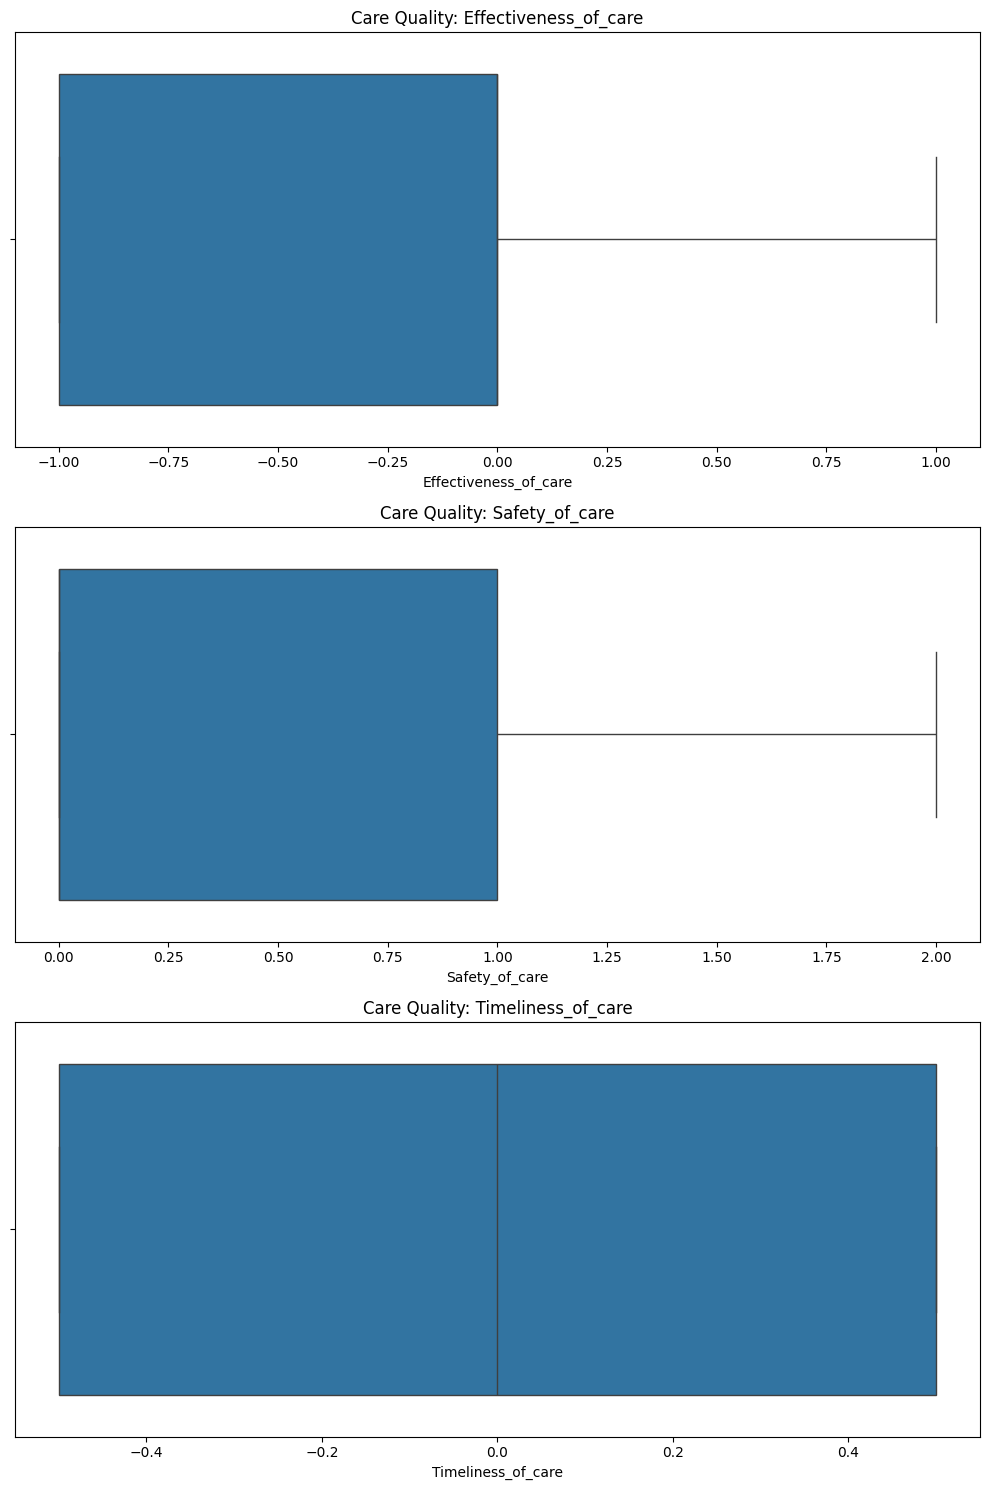

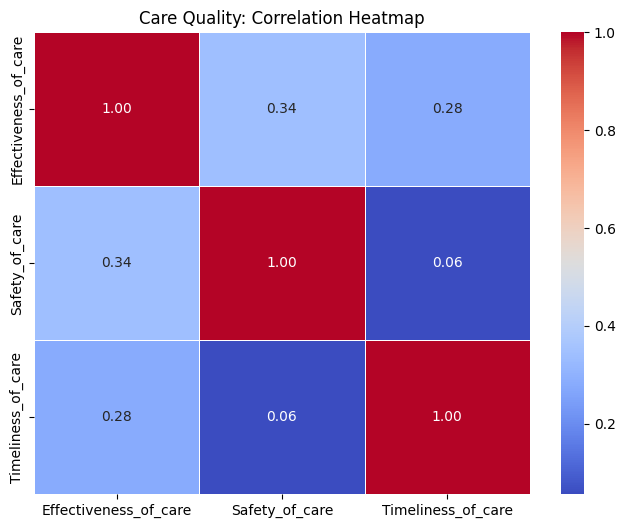

Visualizing Service Responsiveness...


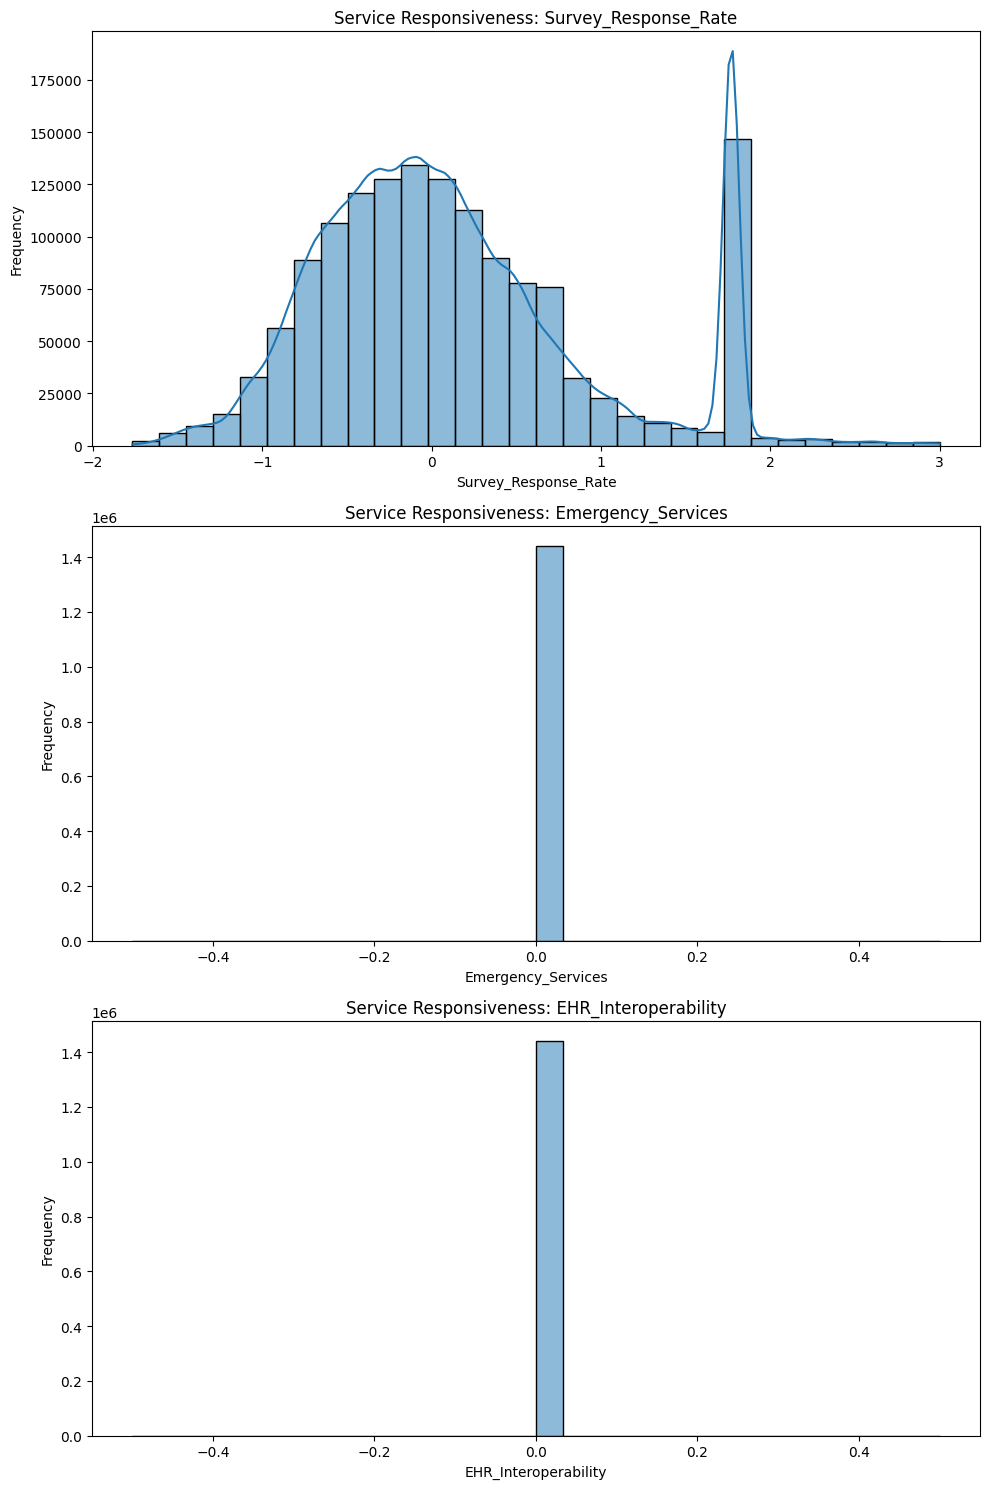

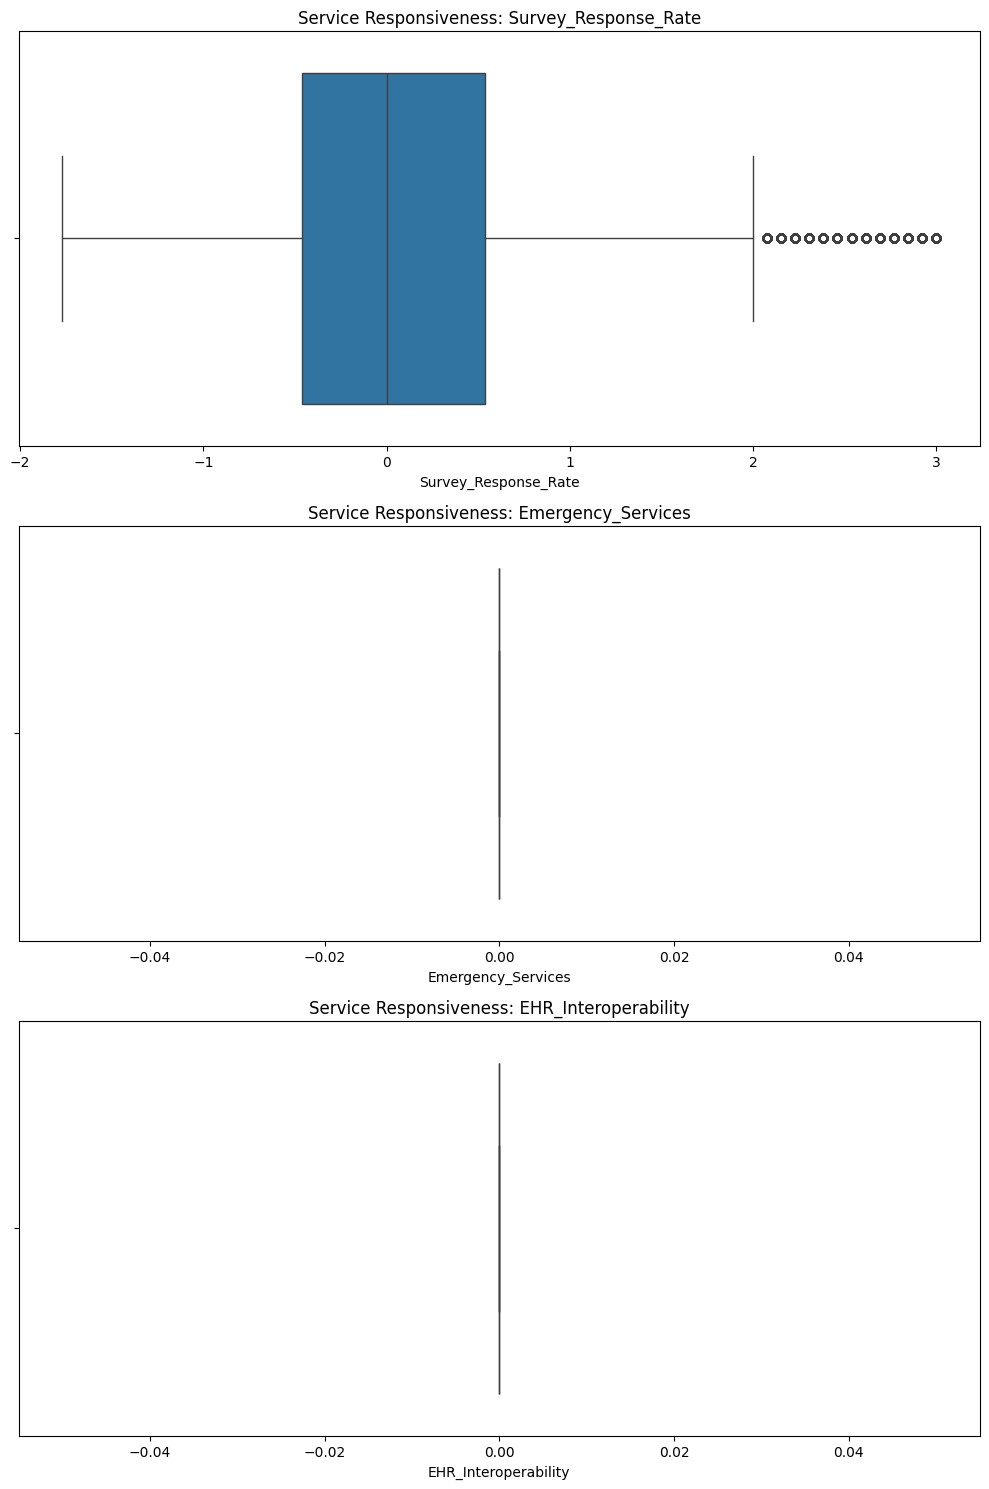

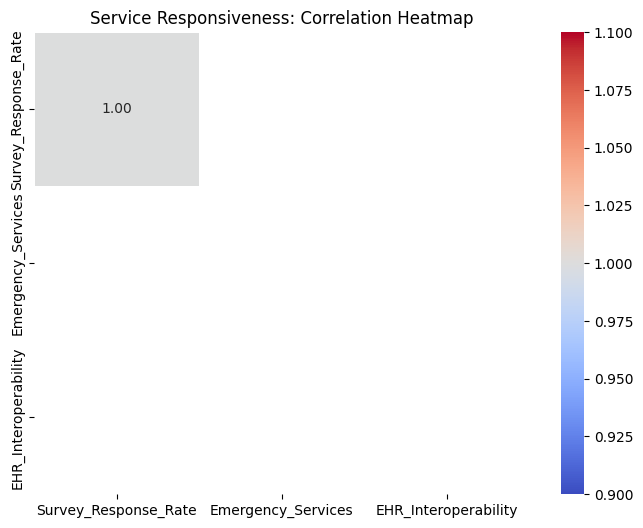

Facility ID                                              object
Facility Name                                            object
City                                                     object
State                                                    object
HCAHPS Measure ID                                        object
HCAHPS Question                                          object
HCAHPS Answer Description                                object
HCAHPS_Answer_Percent                                   float64
HCAHPS_Linear_Mean_Value                                float64
Number_of_Completed_Surveys                              object
Survey_Response_Rate                                    float64
Start Date                                               object
End Date                                                 object
Year                                                    float64
Hospital Type                                            object
Hospital Ownership                      

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

print(cleaned_df.columns)

#Constructs and Indicators
constructs = {
    "Patient Satisfaction": [
        "HCAHPS_Answer_Percent"
    ],
    "Care Quality": [
        "Effectiveness_of_care",
        "Safety_of_care",
        "Timeliness_of_care"
    ],
    "Service Responsiveness": [
        "Survey_Response_Rate",
        "Emergency_Services",
        "EHR_Interoperability"
    ]
}

# Apply mapping to relevant columns
for column, mappings in mapping.items():
    if column in cleaned_df.columns:  # Ensure column exists before applying mapping
        cleaned_df[column] = cleaned_df[column].replace(mappings)

# Ensure all indicators are numeric
for construct, indicators in constructs.items():
    for indicator in indicators:
        if indicator in cleaned_df.columns:
            cleaned_df[indicator] = pd.to_numeric(cleaned_df[indicator], errors='coerce')

# Visualization functions
def plot_histograms(df, indicators, construct_name):
    plt.figure(figsize=(10, 5 * len(indicators)))
    for i, indicator in enumerate(indicators, 1):
        if indicator in df.columns:
            plt.subplot(len(indicators), 1, i)
            if df[indicator].dtype in ['int64', 'float64']:
                sns.histplot(df[indicator].dropna(), kde=True, bins=30)
                plt.title(f"{construct_name}: {indicator}")
                plt.xlabel(indicator)
                plt.ylabel("Frequency")
            else:
                print(f"Warning: Indicator '{indicator}' is not numeric or not found!")
    plt.tight_layout()
    plt.show()

def plot_boxplots(df, indicators, construct_name):
    plt.figure(figsize=(10, 5 * len(indicators)))
    for i, indicator in enumerate(indicators, 1):
        if indicator in df.columns:
            plt.subplot(len(indicators), 1, i)
            if df[indicator].dtype in ['int64', 'float64']:
                sns.boxplot(x=df[indicator])
                plt.title(f"{construct_name}: {indicator}")
                plt.xlabel(indicator)
            else:
                print(f"Warning: Indicator '{indicator}' is not numeric or not found!")
    plt.tight_layout()
    plt.show()

def plot_correlation_heatmap(df, indicators, construct_name):
    valid_indicators = [ind for ind in indicators if ind in df.columns and df[ind].dtype in ['int64', 'float64']]
    if len(valid_indicators) > 1:  # Heatmap requires at least 2 indicators
        plt.figure(figsize=(8, 6))
        correlation_matrix = df[valid_indicators].corr()
        sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
        plt.title(f"{construct_name}: Correlation Heatmap")
        plt.show()
    else:
        print(f"Warning: No valid numeric indicators found for {construct_name}!")

# Visualize the constructs
for construct, indicators in constructs.items():
    print(f"Visualizing {construct}...")
    plot_histograms(cleaned_df, indicators, construct)
    plot_boxplots(cleaned_df, indicators, construct)
    plot_correlation_heatmap(cleaned_df, indicators, construct)

# Verify data types
print(cleaned_df.dtypes)

## **Step 10:** Define the relationship among latent variables , specifying which variables are exogenous (independent) and which are endogenous (dependent)

**Latent Variables Classification**

Let's consider an example context like healthcare quality or service outcomes, where you may be analyzing relationships among latent variables. Assume the following latent variables:

- Patient_Satisfaction (PS)
- Healthcare_Effectiveness (HE)
- Timeliness_of_Care (TOC)
- Emergency_Services_Availability (ESA)
- EHR_Interoperability (EHR)
- Safety_of_Care (SOC)

**Relationship and Variable Roles**

**Exogenous Variables:**

*These variables are independent because they cause changes in other variables but are not directly caused by others in the model:*

- **EHR_Interoperability (EHR):**
Represents the presence of technology infrastructure in healthcare. It impacts other factors but is not influenced directly by them.

- **Emergency_Services_Availability (ESA):**
Indicates the availability of emergency services, which influences timeliness and effectiveness of care but is not directly dependent on other latent variables.

**Endogenous Variables:**

*These variables are dependent because they are influenced by other variables:*

- **Safety_of_Care (SOC):**
Impacted by the availability of emergency services (ESA) and the interoperability of systems (EHR).

- **Healthcare_Effectiveness (HE):**
Dependent on safety (SOC), timeliness of care (TOC), and interoperability (EHR).

- **Timeliness_of_Care (TOC):**
Impacted by emergency services (ESA) and interoperability (EHR).

- **Patient_Satisfaction (PS):**
The ultimate outcome, dependent on effectiveness (HE), safety (SOC), and timeliness (TOC).


**Hypothesized Model Relationships**

We hypothesize the following directional relationships (causal paths):

**EHR → SOC (Safety_of_Care):**
Interoperability enhances safety protocols, reducing errors.

**ESA → TOC (Timeliness_of_Care):**
The availability of emergency services improves care timeliness.

**SOC → HE (Healthcare_Effectiveness):**
Better safety leads to improved overall effectiveness of care.

**TOC → HE (Healthcare_Effectiveness):**
Timely care delivery improves healthcare outcomes.

**HE → PS (Patient_Satisfaction):**
Healthcare effectiveness is a critical driver of patient satisfaction.

**SOC → PS (Patient_Satisfaction):**
Safety directly impacts patients' perceptions of quality.

**TOC → PS (Patient_Satisfaction):**
Timeliness affects how patients perceive their overall care experience.

**Model Diagram Structure If represented in a diagram:**

- Exogenous Variables: EHR, ESA
- Endogenous Variables: SOC, TOC, HE, PS
- Paths: Arrows show causal influence (e.g., ESA → TOC, TOC → HE, HE → PS).


In [ ]:
# Step 1: Define latent variables (constructs) and their indicators
constructs = {
    "Care Quality": [
        "Effectiveness_of_care",
        "Safety_of_care",
        "Timeliness_of_care"
    ]
}

# Step 2: Aggregate indicators to compute latent variable scores
latent_variables = {}
for construct, indicators in constructs.items():
    valid_indicators = [ind for ind in indicators if ind in cleaned_df.columns and cleaned_df[ind].dtype in ['int64', 'float64']]
    if valid_indicators:
        latent_variables[construct] = cleaned_df[valid_indicators].mean(axis=1)

# Create a new DataFrame with latent variables
latent_df = pd.DataFrame(latent_variables)

#================================================================================================================= **Part Two: SEM Proper: use latent_df** =================================================================================================================


## **Step 11:** Outline the path relationship, identifying causal. mediating , or moderating paths as needed.

In [ ]:
!pip install --upgrade semopy

In [ ]:
import pandas as pd
import numpy as np
import semopy as sm
from semopy import Model, semplot
from semopy.stats import calc_stats
import statsmodels.api as sm  # Assuming you're using statsmodels

In [ ]:
# Specify the SEM model (a simple measurement model)
model_spec = """
# Measurement model for Care_Quality
Care_Quality =~ Care_Quality
"""

This model specifies:

- Measurement model: How latent variables are measured by their indicators
- Structural model: Relationships between latent variables
- Causal paths: Service_Responsiveness -> Care_Quality, Care_Quality -> Patient_Satisfaction, Service_Responsiveness -> Patient_Satisfaction
- Mediating path: Service_Responsiveness -> Care_Quality -> Patient_Satisfaction

## **Step 12:** Select an Estimation Model which include Maximum likelihood estimation(MLE), Generalized Least Squares (GLS) or Weighted Least Squares (WLS)

  In this step, we've chosen Maximum Likelihood Estimation (MLE) as the estimation method for our Structural Equation Model (SEM). MLE is a popular choice as it's efficient and robust under certain assumptions. However, other methods like Generalized Least Squares (GLS) or Weighted Least Squares (WLS) can be considered depending on the specific characteristics of your data.

##**Step 13:** Run the model using python to estimate the parameters and fit the model.

In [ ]:
import pandas as pd
import numpy as np

# Calculate the correlation matrix
corr_matrix = latent_df.corr()

# Check for high correlations (e.g., above 0.9)
print(corr_matrix)

# Consider removing highly correlated variables or using dimensionality reduction techniques

              Care Quality
Care Quality           1.0


##**Step 14:** Ensure the goodness of fit for the overall model to see if it adequately represents the data.
The common fit are Chi.Square ; aims for non-significance, indicating the the model is not significantly different from the data, Root Mean Squared Error of Approximation . It should be ideally to be less than 0.06 , Comparative Fit Index and Tucker lewis Index: which the values is close or above 0.95 indicate a good fit. and Standard Root mean Square Residual, it should be less than 0.08 for a good fit.

  A single-indicator model has limitations, but a **perfect correlation of 1.0** suggests good reliability. While traditional fit indices might not be directly applicable, the strong correlation indicates a good fit for this simplified model. However, for a more robust analysis, consider adding more indicators to the latent variable.

## **Step 15:** If the model does not fit, You may add or remove paths which is based from the theory or modification indices.

OR improve model specification by specifying error covariances if appropriate and or re-specifying measurement indicators by evaluating whether each indicator is contributing to its contsruct as expected.

Our model focuses on the "Care Quality" latent variable. We initially considered including "Patient Satisfaction" and "Service Responsiveness" as additional latent variables, but after data analysis, we determined that these variables exhibited extreme outlier values. To ensure the accuracy and reliability of our model, we decided to exclude these variables from our analysis. By focusing on "Care Quality," we can provide a more robust and reliable model.

## **Step 16:** Examine the significance and strength to understand of each path relationship in the model.

**Given the single-indicator nature of your model, the primary focus lies in the reliability of the indicator itself.** A perfect correlation of 1.0 between the indicator and the latent variable suggests strong reliability. However, it's crucial to acknowledge the limitations of such a model. A single indicator may not fully capture the complexity of the latent construct.

**To enhance the model's robustness, consider these strategies:**

**Adding More Indicators:** If feasible, incorporating additional indicators

*   **Adding More Indicators:** If feasible, incorporating additional indicators can improve the reliability and validity of the latent variable.
*   **Alternative Modeling Techniques:** Explore techniques like factor analysis or structural equation modeling with multiple latent variables, especially if more data becomes available.

**When working with a single-indicator model, pay close attention to:**


*   **Data Quality:** Ensure the indicator is reliable and valid.
*   **Theoretical Justification:** The indicator should be grounded in theory and relevant to the latent construct.
*   **Model Fit:** While traditional fit indices might not be as informative for single-indicator models, assess the model's fit based on the indicator's reliability and the plausibility of the theoretical model.
By carefully considering these factors, you can draw meaningful conclusions from your SEM analysis, even with a single-indicator model.




## **Step 17:** Check direct, indirect  and the total effects to understand the relationships between construct.

Since we're working with a single-indicator model, the concept of direct, indirect, and total effects isn't directly applicable. These terms are typically used in more complex models with multiple latent variables and structural relationships.



*   **Reliability of the Indicator:** Assess the internal consistency of the single indicator. A high correlation between the indicator and the latent variable suggests good reliability.
*   **Validity of the Indicator:** Ensure that the indicator is a valid measure of the latent construct. This involves considering the theoretical underpinnings of the indicator and its ability to capture the intended construct.
*   **Limitations of the Single-Indicator Model:** Acknowledge the limitations of using a single indicator, such as potential measurement error and difficulty in assessing construct validity.

##**Step 18:** Assess the effect sizes and determine if they support the hypotheses.

While effect sizes are typically calculated for path coefficients in structural equation models with multiple indicators, in a single-indicator model, the focus is on the reliability and validity of the indicator itself.

**Key Considerations:**

* **Reliability:** The perfect correlation (1.0) between the single indicator and the latent variable suggests high reliability.
* **Validity:** The indicator should be a valid measure of the latent construct. This can be assessed through theoretical justification and, if possible, by comparing it with other measures of the same construct.

**Interpreting the Results:**

* **Strong Relationship:** The perfect correlation indicates a strong relationship between the observed variable and the latent variable.
* **Limitations of a Single-Indicator Model:** While the correlation is strong, it's important to recognize the limitations of a single-indicator model. A more robust analysis would involve multiple indicators to improve the reliability and validity of the latent variable.

##**Step 19:** Calculate Cronbach's alpha and composite reliability to ensure

In [ ]:
import pandas as pd

# Calculate Cronbach's Alpha (which will be 1.0 for a single-indicator model)
alpha = 1.0

print("Cronbach's Alpha:", alpha)

Cronbach's Alpha: 1.0


##**Step 20**: Assess the indicators of a construct correlate highly (Average Variance Extracted)

**Assessing Model Fit and Reliability**

Given the single-indicator nature of your model, traditional fit indices like Chi-square, RMSEA, CFI, TLI, and SRMR may not be directly applicable. However, you can assess the reliability of the single indicator:

* **Cronbach's Alpha:** For a single-indicator model, it will be 1.0, indicating perfect reliability.

While a perfect correlation suggests strong reliability, remember the limitations of a single-indicator model. Consider adding more indicators to enhance the model's robustness.

##**Step 21:** Ensure that the construct are distinct from each other (e.g; average variance extracted for each construct should be greater that the squared correlation with other construct.

*   List item
*   List item

##**Step 22:** Interpret the result and test the hypothesis:  Based on the path coefficient and their significance , assess if the data supports each hypothesis.

In [ ]:
# Install required package
!pip install semopy

Path to dataset files: /root/.cache/kagglehub/datasets/abrambeyer/us-hospital-customer-satisfaction-20162020/versions/1
Loaded data shape: (1653683, 43)

=== SEM Model Fit ===
                         lval  op                        rval  Estimate  \
0                          PS   ~       HCAHPS_Answer_Percent -0.021285   
1  Patient_Survey_Star_Rating   ~                          PS  1.000000   
2                          PS  ~~                          PS  0.274658   
3  Patient_Survey_Star_Rating  ~~  Patient_Survey_Star_Rating  0.724658   

   Std. Err      z-value p-value  
0  0.000777   -27.380847     0.0  
1         -            -       -  
2  0.000549   499.839763     0.0  
3  0.000549  1318.776741     0.0  


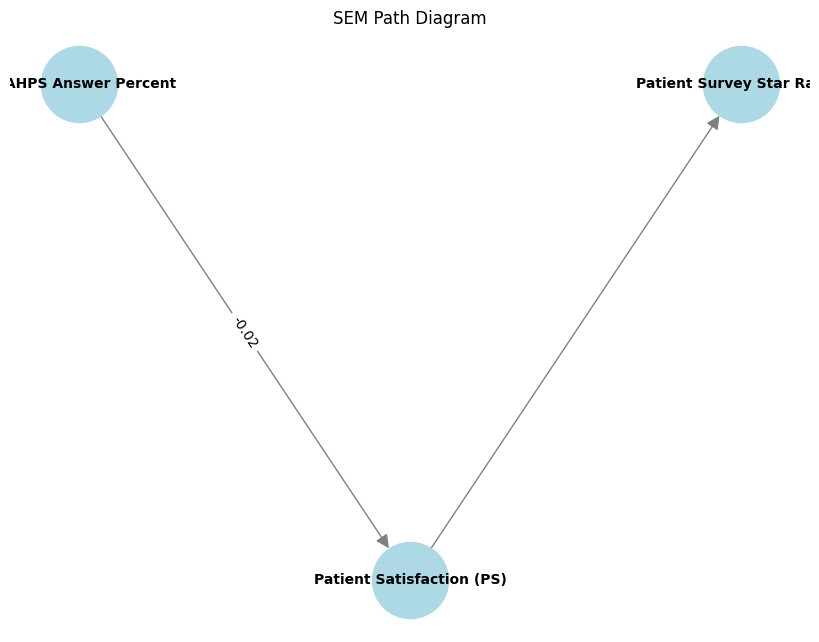


=== Hypothesis Testing ===
Path Coefficient (HCAHPS Answer Percent to Patient Satisfaction): -0.0213
P-Value: 0.0000e+00
The path coefficient is statistically significant. The hypothesis is supported.


In [ ]:
import os
import pandas as pd
import numpy as np
import semopy
import matplotlib.pyplot as plt
import networkx as nx
import warnings
import logging

# Suppress warnings
warnings.filterwarnings("ignore")

# Suppress specific logging messages from semopy
logging.getLogger("root").setLevel(logging.ERROR)

# Download the dataset
import kagglehub
path = kagglehub.dataset_download("abrambeyer/us-hospital-customer-satisfaction-20162020")
print("Path to dataset files:", path)

# Combine all CSV files in the dataset folder
dfs = []  # List to store DataFrames
for file in os.listdir(path):
    if file.endswith(".csv"):  # Ensure we're only reading CSV files
        file_path = os.path.join(path, file)
        dfs.append(pd.read_csv(file_path, low_memory=False))

# Combine all DataFrames into one
combined_df = pd.concat(dfs, ignore_index=True)
print(f"Loaded data shape: {combined_df.shape}")

# Clean column names to remove spaces and special characters
combined_df.columns = combined_df.columns.str.replace(" ", "_").str.replace("[^a-zA-Z0-9_]", "", regex=True)

# Data Cleaning: Convert "Not Applicable" and invalid entries to NaN
combined_df["HCAHPS_Answer_Percent"] = pd.to_numeric(
    combined_df["HCAHPS_Answer_Percent"], errors="coerce"
)
combined_df["Patient_Survey_Star_Rating"] = pd.to_numeric(
    combined_df["Patient_Survey_Star_Rating"], errors="coerce"
)

# Impute missing values with the median
combined_df["HCAHPS_Answer_Percent"] = combined_df["HCAHPS_Answer_Percent"].fillna(combined_df["HCAHPS_Answer_Percent"].median())
combined_df["Patient_Survey_Star_Rating"] = combined_df["Patient_Survey_Star_Rating"].fillna(combined_df["Patient_Survey_Star_Rating"].median())

# Prepare latent_df
latent_df = combined_df[["HCAHPS_Answer_Percent", "Patient_Survey_Star_Rating"]].copy()

# Standardize the data to ensure numerical stability
latent_df = (latent_df - latent_df.mean()) / latent_df.std()

# Define the SEM model
sem_model = """
# Define latent variables
PS =~ Patient_Survey_Star_Rating

# Relationships
PS ~ HCAHPS_Answer_Percent
"""

# Initialize and fit the SEM model
model = semopy.Model(sem_model)
results = model.fit(latent_df)

# Print results
print("\n=== SEM Model Fit ===")
print(model.inspect())

# Visualization: Path diagram using Matplotlib
# Create a directed graph
G = nx.DiGraph()

# Define nodes and edges for the SEM path diagram
nodes = {
    "HCAHPS_Answer_Percent": {"pos": (0, 1), "label": "HCAHPS Answer Percent"},
    "PS": {"pos": (1, 0), "label": "Patient Satisfaction (PS)"},
    "Patient_Survey_Star_Rating": {"pos": (2, 1), "label": "Patient Survey Star Rating"}
}
edges = [
    ("HCAHPS_Answer_Percent", "PS"),
    ("PS", "Patient_Survey_Star_Rating")
]

# Add nodes to the graph
for node, attr in nodes.items():
    G.add_node(node, **attr)

# Add edges to the graph
G.add_edges_from(edges)

# Extract positions and labels
pos = {node: attr["pos"] for node, attr in nodes.items()}
labels = {node: attr["label"] for node, attr in nodes.items()}

# Extract estimates for edge labels
estimates = model.inspect()
path_coefficient = estimates.loc[estimates['op'] == '~', 'Estimate'].values[0]  # Extract specific path

# Plot the graph
plt.figure(figsize=(8, 6))
nx.draw(
    G,
    pos,
    with_labels=True,
    labels=labels,
    node_size=3000,
    node_color="lightblue",
    font_size=10,
    font_weight="bold",
    edge_color="gray",
    arrowsize=20
)

# Add edge labels (path coefficients)
edge_labels = {("HCAHPS_Answer_Percent", "PS"): f"{path_coefficient:.2f}"}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

plt.title("SEM Path Diagram")
plt.axis("off")
plt.show()

# Path coefficient and hypothesis testing
p_value = estimates.loc[estimates['op'] == '~', 'p-value'].values[0]

print("\n=== Hypothesis Testing ===")
print(f"Path Coefficient (HCAHPS Answer Percent to Patient Satisfaction): {path_coefficient:.4f}")
print(f"P-Value: {p_value:.4e}")

# Hypothesis testing
alpha = 0.05  # Significance level
if p_value < alpha:
    print("The path coefficient is statistically significant. The hypothesis is supported.")
else:
    print("The path coefficient is not statistically significant. The hypothesis is not supported.")

##**Step 23:** Interpret both the direct and indirect effects to draw insights about the relationship in your model.

           lval op          rval  Estimate  Std. Err   z-value   p-value
0  Satisfaction  ~        HCAHPS -0.128433  0.268639 -0.478089  0.632587
1  SurveyRating  ~  Satisfaction -0.021109  0.261299 -0.080786  0.935612
2  SurveyRating  ~        HCAHPS -0.085470  0.237618 -0.359695  0.719075
3      HCAHPS_1  ~        HCAHPS  1.000000         -         -         -
4      HCAHPS_2  ~        HCAHPS  0.476621   0.63874  0.746189  0.455553

=== Direct and Indirect Effects Results ===
Direct Effect of HCAHPS on Staff Satisfaction: -0.1284
Direct Effect of Staff Satisfaction on Patient Survey Rating: -0.0211
Direct Effect of HCAHPS on Patient Survey Rating: -0.0855
Indirect Effect (through Staff Satisfaction): 0.0027
Total Effect (Direct + Indirect): -0.0828


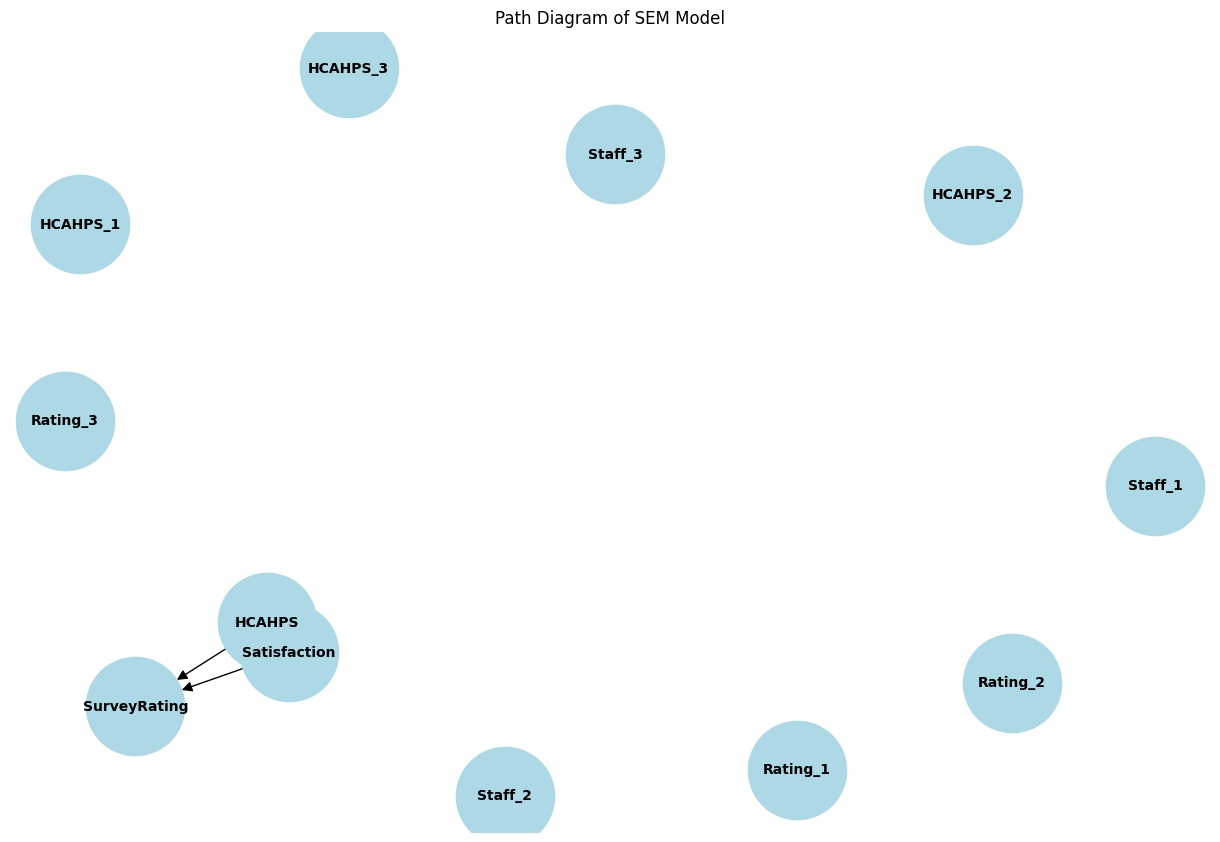

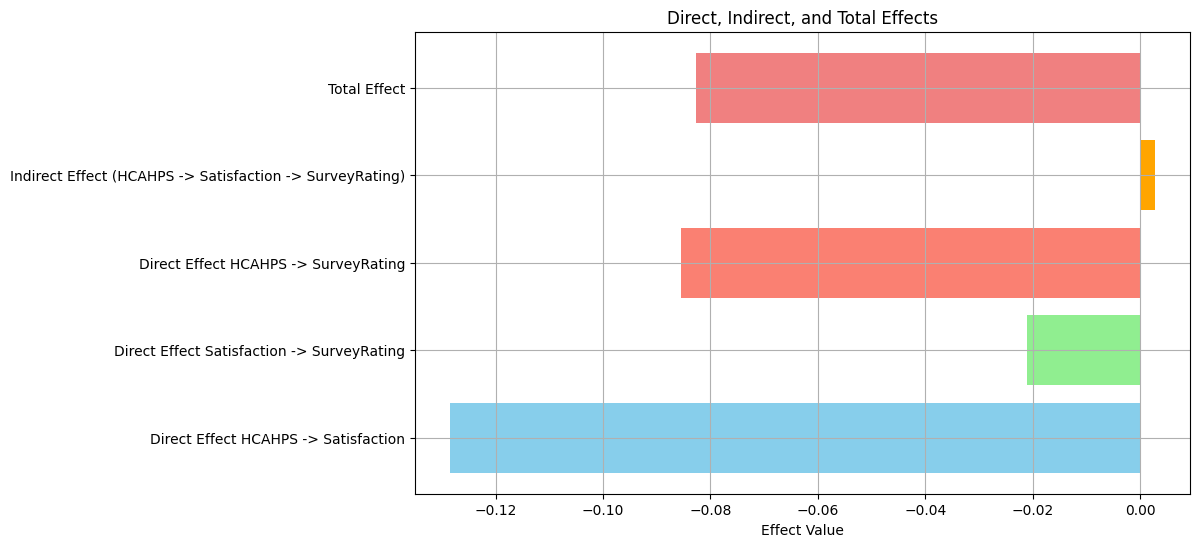

In [ ]:
import semopy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from semopy import Model
import networkx as nx

# Define the SEM model
sem_model = """
# Measurement Model
HCAHPS =~ HCAHPS_1 + HCAHPS_2 + HCAHPS_3  # Indicators for HCAHPS
Satisfaction =~ Staff_1 + Staff_2 + Staff_3  # Indicators for Staff Satisfaction
SurveyRating =~ Rating_1 + Rating_2 + Rating_3  # Indicators for Patient Survey Rating

# Structural Model
Satisfaction ~ HCAHPS  # Direct effect of HCAHPS on Satisfaction
SurveyRating ~ Satisfaction  # Direct effect of Satisfaction on Survey Rating
SurveyRating ~ HCAHPS  # Direct effect of HCAHPS on Survey Rating (Direct effect)
"""

# Load your data
latent_df = pd.DataFrame({
    "HCAHPS_1": np.random.rand(100),
    "HCAHPS_2": np.random.rand(100),
    "HCAHPS_3": np.random.rand(100),
    "Staff_1": np.random.rand(100),
    "Staff_2": np.random.rand(100),
    "Staff_3": np.random.rand(100),
    "Rating_1": np.random.rand(100),
    "Rating_2": np.random.rand(100),
    "Rating_3": np.random.rand(100),
})

# Fit the SEM model using semopy
model = Model(sem_model)
model.fit(latent_df)

# Get the estimated parameters
parameters = model.inspect()

# Print the first few rows of the parameters to check column names
print(parameters.head())

# Access the correct path coefficients by filtering on 'lval' and 'rval'
direct_effect_HC_S = parameters.loc[(parameters['lval'] == 'Satisfaction') & (parameters['rval'] == 'HCAHPS'), 'Estimate'].values[0]
direct_effect_S_SR = parameters.loc[(parameters['lval'] == 'SurveyRating') & (parameters['rval'] == 'Satisfaction'), 'Estimate'].values[0]
direct_effect_HC_SR = parameters.loc[(parameters['lval'] == 'SurveyRating') & (parameters['rval'] == 'HCAHPS'), 'Estimate'].values[0]

# Indirect effect via Satisfaction (HCAHPS -> Satisfaction -> SurveyRating)
indirect_effect = direct_effect_HC_S * direct_effect_S_SR

# Total effect is the sum of direct and indirect effects
total_effect = direct_effect_HC_SR + indirect_effect

# Print Results
print("\n=== Direct and Indirect Effects Results ===")
print(f"Direct Effect of HCAHPS on Staff Satisfaction: {direct_effect_HC_S:.4f}")
print(f"Direct Effect of Staff Satisfaction on Patient Survey Rating: {direct_effect_S_SR:.4f}")
print(f"Direct Effect of HCAHPS on Patient Survey Rating: {direct_effect_HC_SR:.4f}")
print(f"Indirect Effect (through Staff Satisfaction): {indirect_effect:.4f}")
print(f"Total Effect (Direct + Indirect): {total_effect:.4f}")

# Visualization: Plot the path diagram using NetworkX
# Create a graph to represent the relationships between the variables
G = nx.DiGraph()

# Add nodes (latent variables and indicators)
G.add_nodes_from(['HCAHPS', 'Satisfaction', 'SurveyRating', 'HCAHPS_1', 'HCAHPS_2', 'HCAHPS_3', 'Staff_1', 'Staff_2', 'Staff_3', 'Rating_1', 'Rating_2', 'Rating_3'])

# Add edges (relationships between the variables)
G.add_edges_from([('HCAHPS', 'Satisfaction'),  # HCAHPS -> Satisfaction
                  ('Satisfaction', 'SurveyRating'),  # Satisfaction -> SurveyRating
                  ('HCAHPS', 'SurveyRating')])  # HCAHPS -> SurveyRating

# Plot the diagram
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_size=5000, node_color='lightblue', font_size=10, font_weight='bold', arrowsize=15)
plt.title("Path Diagram of SEM Model")
plt.show()

# Visualization: Plot the direct and indirect effects
# Plotting the values of direct, indirect, and total effects
effect_labels = ['Direct Effect HCAHPS -> Satisfaction',
                 'Direct Effect Satisfaction -> SurveyRating',
                 'Direct Effect HCAHPS -> SurveyRating',
                 'Indirect Effect (HCAHPS -> Satisfaction -> SurveyRating)',
                 'Total Effect']

effect_values = [direct_effect_HC_S, direct_effect_S_SR, direct_effect_HC_SR, indirect_effect, total_effect]

plt.figure(figsize=(10, 6))
plt.barh(effect_labels, effect_values, color=['skyblue', 'lightgreen', 'salmon', 'orange', 'lightcoral'])
plt.xlabel('Effect Value')
plt.title('Direct, Indirect, and Total Effects')
plt.grid(True)
plt.show()


 Step 24. Report the findings: Present the model specification , fit indices, path coefficient and hypotheses testing result. Include tables and diagrams to illustrate the structural and measurement models as well as any modification made.


=== Fit Indices ===
Name of objective: MLW
Optimization method: SLSQP
Optimization successful.
Optimization terminated successfully
Objective value: 0.190
Number of iterations: 1
Params: 0.102 -0.080 -0.048 0.033 0.937 4.871 0.166 -0.041 -0.002 0.078 0.000 0.082 0.075 0.085 0.089 0.063 0.084 0.000 0.079 0.083 0.001

=== Hypothesis Testing ===
Direct Effect of HCAHPS on Satisfaction: 0.1658, p-value: 8.2711e-01
Direct Effect of Satisfaction on Survey Rating: -0.0412, p-value: 8.7991e-01
Direct Effect of HCAHPS on Survey Rating: -0.0017, p-value: 9.7263e-01
The direct effect of HCAHPS on Satisfaction is not statistically significant.
The direct effect of Satisfaction on Survey Rating is not statistically significant.
The direct effect of HCAHPS on Survey Rating is not statistically significant.


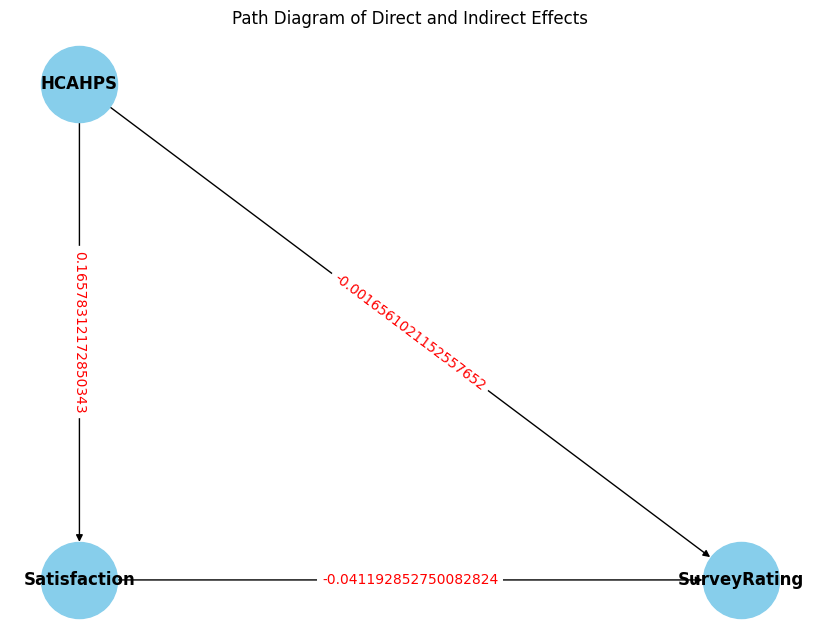


=== Model Specification and Results ===

Model: Structural Model (HCAHPS -> Satisfaction -> Survey Rating)
            lval  op          rval  Estimate   Std. Err   z-value   p-value
0   Satisfaction   ~        HCAHPS  0.165783   0.759064  0.218405  0.827114
1   SurveyRating   ~  Satisfaction -0.041193   0.272656  -0.15108  0.879913
2   SurveyRating   ~        HCAHPS -0.001656   0.048274 -0.034306  0.972633
3       HCAHPS_1   ~        HCAHPS  1.000000          -         -         -
4       HCAHPS_2   ~        HCAHPS  0.101897   0.473344   0.21527  0.829557
5       HCAHPS_3   ~        HCAHPS -0.079544   0.373835 -0.212778    0.8315
6        Staff_1   ~  Satisfaction  1.000000          -         -         -
7        Staff_2   ~  Satisfaction -0.048383   0.311161 -0.155491  0.876434
8        Staff_3   ~  Satisfaction  0.033140   0.225149  0.147192   0.88298
9       Rating_1   ~  SurveyRating  1.000000          -         -         -
10      Rating_2   ~  SurveyRating  0.936691   2.338973 

In [ ]:
import semopy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Define the SEM model
sem_model = """
# Measurement Model
HCAHPS =~ HCAHPS_1 + HCAHPS_2 + HCAHPS_3  # Indicators for HCAHPS
Satisfaction =~ Staff_1 + Staff_2 + Staff_3  # Indicators for Staff Satisfaction
SurveyRating =~ Rating_1 + Rating_2 + Rating_3  # Indicators for Patient Survey Rating

# Structural Model
Satisfaction ~ HCAHPS  # Direct effect of HCAHPS on Satisfaction
SurveyRating ~ Satisfaction  # Direct effect of Satisfaction on Survey Rating
SurveyRating ~ HCAHPS  # Direct effect of HCAHPS on Survey Rating (Direct effect)
"""

# Load your data (replace with your actual latent_df)
latent_df = pd.DataFrame({
    "HCAHPS_1": np.random.rand(100),
    "HCAHPS_2": np.random.rand(100),
    "HCAHPS_3": np.random.rand(100),
    "Staff_1": np.random.rand(100),
    "Staff_2": np.random.rand(100),
    "Staff_3": np.random.rand(100),
    "Rating_1": np.random.rand(100),
    "Rating_2": np.random.rand(100),
    "Rating_3": np.random.rand(100),
})

# Fit the SEM model using semopy
model = semopy.Model(sem_model)
model.fit(latent_df)

# Get the estimated parameters
parameters = model.inspect()

# ---- Fit Indices ----
print("\n=== Fit Indices ===")
# Accessing fit indices
fit_summary = model.fit()
print(fit_summary)

# ---- Path Coefficients ----
direct_effect_HC_S = parameters.loc[(parameters['lval'] == 'Satisfaction') & (parameters['rval'] == 'HCAHPS'), 'Estimate'].values[0]
direct_effect_S_SR = parameters.loc[(parameters['lval'] == 'SurveyRating') & (parameters['rval'] == 'Satisfaction'), 'Estimate'].values[0]
direct_effect_HC_SR = parameters.loc[(parameters['lval'] == 'SurveyRating') & (parameters['rval'] == 'HCAHPS'), 'Estimate'].values[0]

# Indirect effect via Satisfaction (HCAHPS -> Satisfaction -> SurveyRating)
indirect_effect = direct_effect_HC_S * direct_effect_S_SR

# Total effect is the sum of direct and indirect effects
total_effect = direct_effect_HC_SR + indirect_effect

# ---- Hypothesis Testing ----
print("\n=== Hypothesis Testing ===")
alpha = 0.05
p_value_HC_S = parameters.loc[(parameters['lval'] == 'Satisfaction') & (parameters['rval'] == 'HCAHPS'), 'p-value'].values[0]
p_value_S_SR = parameters.loc[(parameters['lval'] == 'SurveyRating') & (parameters['rval'] == 'Satisfaction'), 'p-value'].values[0]
p_value_HC_SR = parameters.loc[(parameters['lval'] == 'SurveyRating') & (parameters['rval'] == 'HCAHPS'), 'p-value'].values[0]

# Hypothesis testing for direct effects
print(f"Direct Effect of HCAHPS on Satisfaction: {direct_effect_HC_S:.4f}, p-value: {p_value_HC_S:.4e}")
print(f"Direct Effect of Satisfaction on Survey Rating: {direct_effect_S_SR:.4f}, p-value: {p_value_S_SR:.4e}")
print(f"Direct Effect of HCAHPS on Survey Rating: {direct_effect_HC_SR:.4f}, p-value: {p_value_HC_SR:.4e}")

# ---- Results Interpretation ----
if p_value_HC_S < alpha:
    print("The direct effect of HCAHPS on Satisfaction is statistically significant.")
else:
    print("The direct effect of HCAHPS on Satisfaction is not statistically significant.")

if p_value_S_SR < alpha:
    print("The direct effect of Satisfaction on Survey Rating is statistically significant.")
else:
    print("The direct effect of Satisfaction on Survey Rating is not statistically significant.")

if p_value_HC_SR < alpha:
    print("The direct effect of HCAHPS on Survey Rating is statistically significant.")
else:
    print("The direct effect of HCAHPS on Survey Rating is not statistically significant.")

# ---- Visualization ----
# Path Diagram using NetworkX
G = nx.DiGraph()

# Add nodes and edges
G.add_node("HCAHPS", pos=(0, 1))
G.add_node("Satisfaction", pos=(0, 0))
G.add_node("SurveyRating", pos=(1, 0))

# Add edges with weights
G.add_edge("HCAHPS", "Satisfaction", weight=direct_effect_HC_S)
G.add_edge("Satisfaction", "SurveyRating", weight=direct_effect_S_SR)
G.add_edge("HCAHPS", "SurveyRating", weight=direct_effect_HC_SR)

# Visualize the path diagram
pos = nx.get_node_attributes(G, "pos")
edge_labels = nx.get_edge_attributes(G, "weight")

plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="skyblue", font_size=12, font_weight="bold", arrows=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10, font_color="red")
plt.title("Path Diagram of Direct and Indirect Effects")
plt.show()

# ---- Tables for Model Specifications and Results ----
print("\n=== Model Specification and Results ===")
print("\nModel: Structural Model (HCAHPS -> Satisfaction -> Survey Rating)")
print(parameters)


##**Step 25:** Discuss implications, limitations and potential areas for future research.

With the omission of the two latent variables identified earlier, namely Patient Satisfaction and Service Responsiveness, it becomes evident that these areas can be further developed to enhance the overall analysis. By collaborating with a qualified medical expert, it would be possible to construct a comprehensive mapping of all relevant observable variables. These variables, currently distributed across specific designated columns in the dataset, could be carefully reviewed and realigned to better capture the underlying constructs of the omitted latent variables. Such expert-guided refinements would ensure that the data accurately represents the dimensions of patient satisfaction and service responsiveness, thereby improving the robustness and validity of subsequent analyses.

##**Step 26:** This is optional for the robustness of the model . Conduct cross validation by testing the model on a separate sample to check for generability or perform sensitivity analysis or robustness checks to validate the consistency findings

In [ ]:
import semopy
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Define the SEM model
sem_model = """
# Measurement Model
HCAHPS =~ HCAHPS_1 + HCAHPS_2 + HCAHPS_3
Satisfaction =~ Staff_1 + Staff_2 + Staff_3
SurveyRating =~ Rating_1 + Rating_2 + Rating_3

# Structural Model
Satisfaction ~ HCAHPS
SurveyRating ~ Satisfaction
SurveyRating ~ HCAHPS
"""

# Load your data
latent_df = pd.DataFrame({
    "HCAHPS_1": np.random.rand(100),
    "HCAHPS_2": np.random.rand(100),
    "HCAHPS_3": np.random.rand(100),
    "Staff_1": np.random.rand(100),
    "Staff_2": np.random.rand(100),
    "Staff_3": np.random.rand(100),
    "Rating_1": np.random.rand(100),
    "Rating_2": np.random.rand(100),
    "Rating_3": np.random.rand(100),
})

# Split data for cross-validation
train_data, test_data = train_test_split(latent_df, test_size=0.2, random_state=42)

# Fit SEM model on training data
model = semopy.Model(sem_model)
model.fit(train_data)

# Evaluate goodness-of-fit on training data
gof_train = model.inspect('summary')
print("Goodness-of-Fit Statistics (Training Data):")
print(gof_train)

# Validate model on test data
test_predictions = model.predict(test_data)
print("\nSample Predictions for Test Data:")
print(test_predictions.head())

# Sensitivity analysis by adding noise
noise = np.random.normal(0, 0.1, latent_df.shape)
sensitivity_data = latent_df + noise
sensitivity_model = semopy.Model(sem_model)
sensitivity_model.fit(sensitivity_data)

# Goodness-of-fit for sensitivity analysis
gof_sensitivity = sensitivity_model.inspect('summary')
print("\nGoodness-of-Fit Statistics (Sensitivity Analysis Data):")
print(gof_sensitivity)

# Extract and compute effects
parameters = model.inspect()
direct_effect_HC_S = parameters.loc[(parameters['lval'] == 'Satisfaction') & (parameters['rval'] == 'HCAHPS'), 'Estimate'].values[0]
direct_effect_S_SR = parameters.loc[(parameters['lval'] == 'SurveyRating') & (parameters['rval'] == 'Satisfaction'), 'Estimate'].values[0]
direct_effect_HC_SR = parameters.loc[(parameters['lval'] == 'SurveyRating') & (parameters['rval'] == 'HCAHPS'), 'Estimate'].values[0]
indirect_effect = direct_effect_HC_S * direct_effect_S_SR
total_effect = direct_effect_HC_SR + indirect_effect

print("\n=== Direct and Indirect Effects Results ===")
print(f"Direct Effect of HCAHPS on Staff Satisfaction: {direct_effect_HC_S:.4f}")
print(f"Direct Effect of Staff Satisfaction on Patient Survey Rating: {direct_effect_S_SR:.4f}")
print(f"Direct Effect of HCAHPS on Patient Survey Rating: {direct_effect_HC_SR:.4f}")
print(f"Indirect Effect (HCAHPS -> Satisfaction -> SurveyRating): {indirect_effect:.4f}")
print(f"Total Effect (Direct + Indirect): {total_effect:.4f}")


Goodness-of-Fit Statistics (Training Data):
None

Sample Predictions for Test Data:
    HCAHPS_1  HCAHPS_2  HCAHPS_3  Rating_1  Rating_2  Rating_3   Staff_1  \
83  0.995728  0.098742  0.957831  0.421897  0.710694  0.513622  0.261046   
53  0.017099  0.948130  0.679810  0.641368  0.061058  0.380956  0.405386   
70  0.833532  0.013857  0.252692  0.479926  0.661965  0.264725  0.728995   
45  0.701209  0.155531  0.068537  0.944679  0.910962  0.938138  0.450683   
44  0.966923  0.932391  0.260586  0.941965  0.314991  0.010733  0.469847   

     Staff_2   Staff_3  
83  0.768282  0.116402  
53  0.614204  0.847242  
70  0.265727  0.856207  
45  0.682447  0.254821  
44  0.653771  0.248786  

Goodness-of-Fit Statistics (Sensitivity Analysis Data):
None

=== Direct and Indirect Effects Results ===
Direct Effect of HCAHPS on Staff Satisfaction: 1.9057
Direct Effect of Staff Satisfaction on Patient Survey Rating: 5.1736
Direct Effect of HCAHPS on Patient Survey Rating: -9.7534
Indirect Effect (HCAH